<a href="https://colab.research.google.com/github/reynarajkumar/verdictvision-legal-ai/blob/main/DL_CMPE_258_Verdict_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STEP 1: Data Acquisition – Download California CaseLaw Files

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# ========== CONFIG ==========
LAST_VOL = 251        # highest volume available
COUNT = 10            # how many volumes to download
START_VOL = LAST_VOL - COUNT + 1  # 242 → 251
OUTPUT_DIR = "/content/all_cases_json"
BASE_ROOT = "https://static.case.law/cal-rptr-3d/{}/cases/"
# ============================

# Make output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

def get_soup(url):
    r = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    r.raise_for_status()
    return BeautifulSoup(r.text, "html.parser")

global_index = 1

for vol in range(START_VOL, LAST_VOL + 1):
    url = BASE_ROOT.format(vol)
    print(f"\n===== Volume {vol} =====")
    print(f"Fetching: {url}")

    try:
        soup = get_soup(url)
    except Exception as e:
        print(f"  !! Cannot load volume {vol}: {e}")
        continue

    json_files = sorted(
        href for a in soup.find_all("a", href=True)
        if (href := a["href"].lower()).endswith(".json")
    )

    print(f"  Found {len(json_files)} JSON files")

    for json_file in json_files:
        file_url = urljoin(url, json_file)
        dest_path = os.path.join(OUTPUT_DIR, f"{global_index}.json")

        print(f"    {global_index}: {file_url}")

        try:
            r = requests.get(file_url, headers={"User-Agent": "Mozilla/5.0"})
            r.raise_for_status()
            with open(dest_path, "wb") as f:
                f.write(r.content)
            global_index += 1
        except Exception as e:
            print(f"      !! Failed: {e}")

print("\nDone! Files saved in:", OUTPUT_DIR)



===== Volume 242 =====
Fetching: https://static.case.law/cal-rptr-3d/242/cases/
  Found 77 JSON files
    1: https://static.case.law/cal-rptr-3d/242/cases/0001-01.json
    2: https://static.case.law/cal-rptr-3d/242/cases/0015-01.json
    3: https://static.case.law/cal-rptr-3d/242/cases/0035-01.json
    4: https://static.case.law/cal-rptr-3d/242/cases/0052-01.json
    5: https://static.case.law/cal-rptr-3d/242/cases/0054-01.json
    6: https://static.case.law/cal-rptr-3d/242/cases/0067-01.json
    7: https://static.case.law/cal-rptr-3d/242/cases/0076-01.json
    8: https://static.case.law/cal-rptr-3d/242/cases/0087-01.json
    9: https://static.case.law/cal-rptr-3d/242/cases/0102-01.json
    10: https://static.case.law/cal-rptr-3d/242/cases/0109-01.json
    11: https://static.case.law/cal-rptr-3d/242/cases/0138-01.json
    12: https://static.case.law/cal-rptr-3d/242/cases/0144-01.json
    13: https://static.case.law/cal-rptr-3d/242/cases/0156-01.json
    14: https://static.case.law/cal

#STEP 2: Export Downloded Cases

In [ ]:
import shutil
from google.colab import files

# Folder where the JSON files were saved in the previous cell
SOURCE_DIR = "/content/all_cases_json"

# Path for the zip file
ZIP_PATH = "/content/all_cases_json_zip"

# Create ZIP (this makes all_cases_json_zip.zip)
shutil.make_archive(ZIP_PATH, 'zip', SOURCE_DIR)

print("Created ZIP at:", ZIP_PATH + ".zip")

files.download("/content/all_cases_json_zip.zip")


Created ZIP at: /content/all_cases_json_zip.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Step 3 : Download and Extract case_law dataset from google drive

In [ ]:
!pip install gdown

import gdown
import zipfile
import os

# === CONFIG ===
FILE_ID = "1KvKVVkCfpxordzChDezxB3G3JNDdv6zh"
OUTPUT_ZIP = "/content/case_law.zip"
EXTRACT_DIR = "/content/case_law"
# ==============

# Create direct download URL
url = f"https://drive.google.com/uc?id={FILE_ID}"

# Download the ZIP
gdown.download(url, OUTPUT_ZIP, quiet=False)

# Make extraction directory
os.makedirs(EXTRACT_DIR, exist_ok=True)

# Extract the ZIP
with zipfile.ZipFile(OUTPUT_ZIP, "r") as zf:
    zf.extractall(EXTRACT_DIR)

print("Done! Extracted to:", EXTRACT_DIR)
print("Top-level contents:", os.listdir(EXTRACT_DIR))


Downloading...
From: https://drive.google.com/uc?id=1KvKVVkCfpxordzChDezxB3G3JNDdv6zh
To: /content/case_law.zip
100%|██████████| 10.3M/10.3M [00:00<00:00, 29.7MB/s]


Done! Extracted to: /content/case_law
Top-level contents: ['654.json', '577.json', '246.json', '652.json', '89.json', '697.json', '228.json', '489.json', '608.json', '27.json', '478.json', '694.json', '541.json', '660.json', '545.json', '110.json', '613.json', '151.json', '68.json', '7.json', '708.json', '108.json', '140.json', '412.json', '423.json', '122.json', '230.json', '451.json', '655.json', '692.json', '167.json', '445.json', '37.json', '377.json', '607.json', '612.json', '493.json', '387.json', '221.json', '60.json', '71.json', '467.json', '482.json', '649.json', '9.json', '341.json', '601.json', '173.json', '69.json', '429.json', '477.json', '50.json', '485.json', '296.json', '234.json', '474.json', '374.json', '279.json', '425.json', '355.json', '617.json', '80.json', '22.json', '203.json', '54.json', '206.json', '456.json', '408.json', '17.json', '703.json', '141.json', '367.json', '307.json', '593.json', '587.json', '133.json', '631.json', '209.json', '572.json', '437.json

#STEP 4: DATA LOADING & VALIDATION

In [ ]:
import json
import os
import pandas as pd

def load_and_validate_cases(input_dir='/content/case_law'):
    """
    Load JSON case files and perform initial validation
    """
    # Check if directory exists
    if not os.path.exists(input_dir):
        print(f"Error: Directory '{input_dir}' not found!")
        print(f"\nPlease ensure your JSON files are in: {input_dir}")
        return []

    # Get all JSON files
    json_files = [f for f in os.listdir(input_dir) if f.endswith('.json')]

    print(f"\nInput directory: {input_dir}")
    print(f"Found {len(json_files)} JSON files")

    if len(json_files) == 0:
        print("No JSON files found!")
        return []

    # Load each case
    cases = []
    errors = []

    print(f"\nLoading cases...")

    for i, filename in enumerate(json_files, 1):
        filepath = os.path.join(input_dir, filename)

        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                case = json.load(f)

                # Basic validation
                if 'id' in case and 'casebody' in case:
                    cases.append(case)
                    if i % 10 == 0:
                        print(f"  Loaded {i}/{len(json_files)} files...")
                else:
                    errors.append(f"{filename}: Missing required fields")

        except json.JSONDecodeError as e:
            errors.append(f"{filename}: Invalid JSON - {e}")
        except Exception as e:
            errors.append(f"{filename}: {e}")

    # Summary
    print(f"\n{'='*70}")
    print("LOADING SUMMARY")
    print(f"{'='*70}")
    print(f"Successfully loaded: {len(cases)} cases")

    if errors:
        print(f"Errors: {len(errors)}")
        print("\nFirst 3 errors:")
        for err in errors[:3]:
            print(f"  - {err}")

    # Show sample case structure
    if cases:
        print(f"\n{'='*70}")
        print("SAMPLE CASE STRUCTURE")
        print(f"{'='*70}")
        sample = cases[0]
        print(f"Case ID: {sample.get('id', 'N/A')}")
        print(f"Case Name: {sample.get('name', 'N/A')[:60]}...")
        print(f"Decision Date: {sample.get('decision_date', 'N/A')}")
        print(f"Court: {sample.get('court', {}).get('name', 'N/A') if isinstance(sample.get('court'), dict) else sample.get('court', 'N/A')}")
        print(f"\nTop-level keys: {list(sample.keys())}")

        if 'casebody' in sample:
            print(f"Casebody keys: {list(sample['casebody'].keys())}")

    print(f"{'='*70}")

    return cases

# Load all cases from your directory
cases = load_and_validate_cases('/content/all_cases_json')

# Display statistics
if cases:
    print(f"\nSuccessfully loaded {len(cases)} cases!")
    print(f"\nQuick Statistics:")

    # Count cases with opinions
    with_opinions = sum(1 for c in cases if 'casebody' in c and 'opinions' in c['casebody'])
    print(f"  Cases with opinions: {with_opinions}")

    # Count cases with citations
    with_citations = sum(1 for c in cases if 'citations' in c and c['citations'])
    print(f"  Cases with citations: {with_citations}")

    # Show date range
    dates = [c.get('decision_date', '') for c in cases if c.get('decision_date')]
    if dates:
        dates_sorted = sorted(dates)
        print(f"  Date range: {dates_sorted[0]} to {dates_sorted[-1]}")

    print(f"\nData loaded successfully! Ready for Step 2 (Text Extraction)")
else:
    print("\nNo cases loaded. Please check your input directory.")



Input directory: /content/all_cases_json
Found 713 JSON files

Loading cases...
  Loaded 10/713 files...
  Loaded 20/713 files...
  Loaded 30/713 files...
  Loaded 40/713 files...
  Loaded 50/713 files...
  Loaded 60/713 files...
  Loaded 70/713 files...
  Loaded 80/713 files...
  Loaded 90/713 files...
  Loaded 100/713 files...
  Loaded 110/713 files...
  Loaded 120/713 files...
  Loaded 130/713 files...
  Loaded 140/713 files...
  Loaded 150/713 files...
  Loaded 160/713 files...
  Loaded 170/713 files...
  Loaded 180/713 files...
  Loaded 190/713 files...
  Loaded 200/713 files...
  Loaded 210/713 files...
  Loaded 220/713 files...
  Loaded 230/713 files...
  Loaded 240/713 files...
  Loaded 250/713 files...
  Loaded 260/713 files...
  Loaded 270/713 files...
  Loaded 280/713 files...
  Loaded 290/713 files...
  Loaded 300/713 files...
  Loaded 310/713 files...
  Loaded 320/713 files...
  Loaded 330/713 files...
  Loaded 340/713 files...
  Loaded 350/713 files...
  Loaded 360/713 f

#Step 5: Text Extraction & Cleaning

In [ ]:
# ============================================================================
#  TEXT EXTRACTION & CLEANING
# Input: 713 loaded cases
# Output: Structured data with clean text
# ============================================================================

import re

def extract_metadata(case):
    """Extract structured metadata"""
    metadata = {
        'case_id': case.get('id', ''),
        'case_name': case.get('name', ''),
        'name_abbreviation': case.get('name_abbreviation', ''),
        'decision_date': case.get('decision_date', ''),
        'docket_number': case.get('docket_number', ''),
    }

    # Court
    court = case.get('court', {})
    metadata['court_name'] = court.get('name', '') if isinstance(court, dict) else str(court)

    # Jurisdiction
    jurisdiction = case.get('jurisdiction', {})
    metadata['jurisdiction'] = jurisdiction.get('name', '') if isinstance(jurisdiction, dict) else str(jurisdiction)

    # Citations
    citations = []
    if 'citations' in case:
        for cite in case['citations']:
            if isinstance(cite, dict) and 'cite' in cite:
                citations.append(cite['cite'])
            elif isinstance(cite, str):
                citations.append(cite)
    metadata['citations'] = citations

    # Judges from casebody
    judges = []
    if 'casebody' in case and 'judges' in case['casebody']:
        judges = case['casebody']['judges']
        if not isinstance(judges, list):
            judges = [judges]
    metadata['judges'] = judges

    return metadata

def extract_full_text(case):
    """Extract complete case text from JSON structure"""
    text_parts = []

    # Case name
    if 'name' in case:
        text_parts.append(f"CASE: {case['name']}")

    # Citations
    if 'citations' in case:
        cites = [c.get('cite', '') if isinstance(c, dict) else str(c)
                for c in case['citations']]
        if cites:
            text_parts.append(f"CITATIONS: {', '.join(cites)}")

    # Casebody
    if 'casebody' in case:
        casebody = case['casebody']

        # Head matter (summary)
        if 'head_matter' in casebody and casebody['head_matter']:
            text_parts.append(f"SUMMARY:\n{casebody['head_matter']}")

        # Parties
        if 'parties' in casebody and casebody['parties']:
            for party in casebody['parties']:
                party_text = party if isinstance(party, str) else party.get('text', '')
                if party_text:
                    text_parts.append(f"PARTY: {party_text}")

        # Attorneys
        if 'attorneys' in casebody and casebody['attorneys']:
            for attorney in casebody['attorneys']:
                atty_text = attorney if isinstance(attorney, str) else attorney.get('text', '')
                if atty_text:
                    text_parts.append(f"ATTORNEY: {atty_text}")

        # Judges
        if 'judges' in casebody and casebody['judges']:
            judges_str = ', '.join([str(j) for j in casebody['judges']])
            text_parts.append(f"JUDGES: {judges_str}")

        # Opinions (MAIN CONTENT)
        if 'opinions' in casebody and casebody['opinions']:
            for i, opinion in enumerate(casebody['opinions']):
                if isinstance(opinion, dict):
                    if 'type' in opinion:
                        text_parts.append(f"OPINION TYPE: {opinion['type']}")
                    if 'author' in opinion:
                        text_parts.append(f"AUTHOR: {opinion['author']}")
                    if 'text' in opinion and opinion['text']:
                        text_parts.append(f"OPINION {i+1}:\n{opinion['text']}")

    return '\n\n'.join([str(part) for part in text_parts if part])

def clean_text(text):
    """Clean and normalize text"""
    if not text:
        return ""

    # Remove excessive whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove page numbers and artifacts
    text = re.sub(r'\[\d+\]', '', text)
    text = re.sub(r'\*\d+', '', text)

    # Normalize quotes
    text = text.replace('"', '"').replace('"', '"')
    text = text.replace(''', "'").replace(''', "'")

    # Normalize newlines
    text = re.sub(r'\n\s*\n', '\n\n', text)

    return text.strip()

def extract_outcome(text):
    """Extract outcome label for classification"""
    if not text or len(text) < 50:
        return 'other'

    text_lower = text.lower()

    if 'affirm' in text_lower and 'not affirm' not in text_lower:
        return 'affirmed'
    elif 'revers' in text_lower:
        return 'reversed'
    elif 'remand' in text_lower:
        return 'remanded'
    elif 'dismiss' in text_lower:
        return 'dismissed'
    elif 'modified' in text_lower:
        return 'modified'
    else:
        return 'other'

# ============================================================================
# PROCESS ALL CASES
# ============================================================================

print("="*70)
print("STEP 2: TEXT EXTRACTION & CLEANING")
print("="*70)

processed_data = []

print(f"\nProcessing {len(cases)} cases...")

for i, case in enumerate(cases):
    try:
        # Extract components
        metadata = extract_metadata(case)
        full_text = extract_full_text(case)
        clean_text_result = clean_text(full_text)
        outcome = extract_outcome(clean_text_result)

        # Combine
        case_data = {
            **metadata,
            'full_text': clean_text_result,
            'text_length': len(clean_text_result),
            'word_count': len(clean_text_result.split()),
            'num_citations': len(metadata['citations']),
            'num_judges': len(metadata['judges']),
            'outcome_label': outcome
        }

        processed_data.append(case_data)

        # Progress indicator
        if (i + 1) % 100 == 0:
            print(f"  Processed {i + 1}/{len(cases)} cases...")

    except Exception as e:
        print(f"  Error processing case {i}: {e}")

# Create DataFrame
df = pd.DataFrame(processed_data)

# Display summary
print(f"\n{'='*70}")
print("EXTRACTION SUMMARY")
print(f"{'='*70}")
print(f"Total cases processed: {len(df)}")
print(f"\nText Statistics:")
print(f"  Average length: {df['text_length'].mean():.0f} characters")
print(f"  Min length: {df['text_length'].min():.0f} characters")
print(f"  Max length: {df['text_length'].max():.0f} characters")
print(f"  Average word count: {df['word_count'].mean():.0f} words")

print(f"\nCitation Statistics:")
print(f"  Average citations: {df['num_citations'].mean():.1f}")
print(f"  Cases with citations: {len(df[df['num_citations'] > 0])}")

print(f"\nOutcome Distribution:")
print(df['outcome_label'].value_counts())

print(f"\nData Quality:")
print(f"  Cases with >1000 chars: {len(df[df['text_length'] > 1000])}")
print(f"  Cases with >5000 chars: {len(df[df['text_length'] > 5000])}")
print(f"  Cases with >10000 chars: {len(df[df['text_length'] > 10000])}")

print(f"{'='*70}")

# Show sample
print(f"\nSample Processed Case:")
sample = df.iloc[0]
print(f"Case: {sample['case_name'][:60]}...")
print(f"Outcome: {sample['outcome_label']}")
print(f"Text length: {sample['text_length']} chars")
print(f"Citations: {len(sample['citations'])}")
print(f"\nText preview:")
print(sample['full_text'][:300] + "...")

print(f"\n completed!")


STEP 2: TEXT EXTRACTION & CLEANING

Processing 713 cases...
  Processed 100/713 cases...
  Processed 200/713 cases...
  Processed 300/713 cases...
  Processed 400/713 cases...
  Processed 500/713 cases...
  Processed 600/713 cases...
  Processed 700/713 cases...

EXTRACTION SUMMARY
Total cases processed: 713

Text Statistics:
  Average length: 39096 characters
  Min length: 317 characters
  Max length: 272688 characters
  Average word count: 6323 words

Citation Statistics:
  Average citations: 2.1
  Cases with citations: 713

Outcome Distribution:
outcome_label
affirmed     535
reversed      87
other         58
remanded      19
dismissed     13
modified       1
Name: count, dtype: int64

Data Quality:
  Cases with >1000 chars: 680
  Cases with >5000 chars: 652
  Cases with >10000 chars: 635

Sample Processed Case:
Case: BARCLAY HOLLANDER CORPORATION, Plaintiff and Appellant, v. C...
Outcome: affirmed
Text length: 92883 chars
Citations: 2

Text preview:
CASE: BARCLAY HOLLANDER CORPORAT

#Step 6: Text Chunking for RAG

In [ ]:
# ============================================================================
#  TEXT CHUNKING FOR RAG
# Create overlapping chunks from long documents
# ============================================================================

def create_text_chunks(text, chunk_size=500, overlap=100):
    """
    Create overlapping text chunks for RAG retrieval

    Parameters:
    - chunk_size: 500 words (optimal for embeddings)
    - overlap: 100 words (preserves context across chunks)
    """
    if not text or len(text) < 100:
        return [{'text': text, 'chunk_id': 0, 'length': len(text.split())}]

    words = text.split()
    chunks = []

    for i in range(0, len(words), chunk_size - overlap):
        chunk_words = words[i:i + chunk_size]
        chunk_text = ' '.join(chunk_words)

        chunks.append({
            'text': chunk_text,
            'chunk_id': len(chunks),
            'start_idx': i,
            'length': len(chunk_words)
        })

        # Stop if we've processed all words
        if len(chunk_words) < chunk_size:
            break

    return chunks if chunks else [{'text': text, 'chunk_id': 0, 'length': len(text.split())}]

# ============================================================================
# CREATE CHUNKS FOR ALL CASES
# ============================================================================

print("="*70)
print("STEP 3: TEXT CHUNKING FOR RAG")
print("="*70)

all_chunks = []
total_chunks = 0

print(f"\nCreating chunks for {len(df)} cases...")
print("Chunk size: 500 words")
print("Overlap: 100 words")

for idx, row in df.iterrows():
    # Create chunks for this case
    chunks = create_text_chunks(row['full_text'], chunk_size=500, overlap=100)

    # Add metadata to each chunk
    for chunk in chunks:
        all_chunks.append({
            'case_id': row['case_id'],
            'case_name': row['case_name'],
            'court': row['court_name'],
            'decision_date': row['decision_date'],
            'citations': row['citations'],
            'judges': row['judges'],
            'outcome': row['outcome_label'],
            'chunk_id': chunk['chunk_id'],
            'text': chunk['text'],
            'chunk_length': chunk['length']
        })

    total_chunks += len(chunks)

    # Progress
    if (idx + 1) % 100 == 0:
        print(f"  Processed {idx + 1}/{len(df)} cases... ({total_chunks} chunks so far)")

# Summary
print(f"\n{'='*70}")
print("CHUNKING SUMMARY")
print(f"{'='*70}")
print(f"Total cases: {len(df)}")
print(f"Total chunks created: {len(all_chunks)}")
print(f"Average chunks per case: {len(all_chunks) / len(df):.1f}")

# Chunk statistics
chunk_lengths = [c['chunk_length'] for c in all_chunks]
print(f"\nChunk Statistics:")
print(f"  Average chunk size: {sum(chunk_lengths) / len(chunk_lengths):.0f} words")
print(f"  Min chunk size: {min(chunk_lengths)} words")
print(f"  Max chunk size: {max(chunk_lengths)} words")

# Sample chunks
print(f"\nSample Chunks:")
for i in range(min(3, len(all_chunks))):
    chunk = all_chunks[i]
    print(f"\n  Chunk {i+1}:")
    print(f"    Case: {chunk['case_name'][:50]}...")
    print(f"    Length: {chunk['chunk_length']} words")
    print(f"    Text: {chunk['text'][:150]}...")

print(f"\n{'='*70}")
print(f"Step 3 complete!")
print(f"Created {len(all_chunks)} chunks for RAG retrieval")
print(f"{'='*70}")


STEP 3: TEXT CHUNKING FOR RAG

Creating chunks for 713 cases...
Chunk size: 500 words
Overlap: 100 words
  Processed 100/713 cases... (1532 chunks so far)
  Processed 200/713 cases... (3250 chunks so far)
  Processed 300/713 cases... (4812 chunks so far)
  Processed 400/713 cases... (6407 chunks so far)
  Processed 500/713 cases... (7998 chunks so far)
  Processed 600/713 cases... (9363 chunks so far)
  Processed 700/713 cases... (11176 chunks so far)

CHUNKING SUMMARY
Total cases: 713
Total chunks created: 11477
Average chunks per case: 16.1

Chunk Statistics:
  Average chunk size: 487 words
  Min chunk size: 46 words
  Max chunk size: 500 words

Sample Chunks:

  Chunk 1:
    Case: BARCLAY HOLLANDER CORPORATION, Plaintiff and Appel...
    Length: 500 words
    Text: CASE: BARCLAY HOLLANDER CORPORATION, Plaintiff and Appellant, v. CALIFORNIA REGIONAL WATER QUALITY CONTROL BOARD, Los Angeles Region, Defendant and Re...

  Chunk 2:
    Case: BARCLAY HOLLANDER CORPORATION, Plaintiff and 

#Step 7: Save All Preprocessed Data

In [ ]:
# ============================================================================
# SAVE PREPROCESSED DATA
# Save in multiple formats for different components
# ============================================================================

import json

output_dir = '/content/verdictvision_preprocessed'
os.makedirs(output_dir, exist_ok=True)

print("="*70)
print(" SAVING PREPROCESSED DATA")
print("="*70)
print(f"\nOutput directory: {output_dir}")

# ============================================================================
# 1. SAVE METADATA CSV (for quick analysis)
# ============================================================================

print("\n[1] Saving metadata CSV")

metadata_df = df[['case_id', 'case_name', 'court_name', 'decision_date',
                   'num_citations', 'num_judges', 'outcome_label',
                   'text_length', 'word_count']].copy()

metadata_df.to_csv(f'{output_dir}/cases_metadata.csv', index=False)
print(f" Saved: cases_metadata.csv ({len(metadata_df)} cases)")

# ============================================================================
# 2. SAVE FULL DATA JSON (complete case data)
# ============================================================================

print("[2] Saving full case data JSON.")

df_json = df.to_dict('records')
with open(f'{output_dir}/cases_full.json', 'w') as f:
    json.dump(df_json, f, indent=2)

print(f" Saved: cases_full.json ({len(df_json)} cases)")

# ============================================================================
# 3. SAVE TEXT CHUNKS JSON (for RAG retrieval)
# ============================================================================

print("[3] Saving text chunks JSON")

with open(f'{output_dir}/text_chunks.json', 'w') as f:
    json.dump(all_chunks, f, indent=2)

print(f" Saved: text_chunks.json ({len(all_chunks)} chunks)")

# ============================================================================
# 4. SAVE CLASSIFICATION DATA CSV (for model training)
# ============================================================================

print("[4] Saving classification data CSV")

classification_df = df[['case_id', 'full_text', 'outcome_label',
                        'num_citations', 'text_length', 'word_count']].copy()

classification_df.to_csv(f'{output_dir}/classification_data.csv', index=False)
print(f"Saved: classification_data.csv ({len(classification_df)} cases)")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print(f"\n{'='*70}")
print("PREPROCESSING COMPLETE!")
print(f"{'='*70}")

print(f"\nFinal Statistics:")
print(f"  Total cases: {len(df)}")
print(f"  Total chunks: {len(all_chunks)}")
print(f"  Chunks per case: {len(all_chunks) / len(df):.1f}")
print(f"  Avg text length: {df['text_length'].mean():.0f} chars")
print(f"  Avg word count: {df['word_count'].mean():.0f} words")

print(f"\nOutput Files:")
print(f"  {output_dir}/")
print(f"  ├── cases_metadata.csv       ({len(df)} rows)")
print(f"  ├── cases_full.json          ({len(df)} cases)")
print(f"  ├── text_chunks.json         ({len(all_chunks)} chunks)")
print(f"  └── classification_data.csv  ({len(df)} rows)")

print(f"\nOutcome Distribution:")
outcome_counts = df['outcome_label'].value_counts()
for outcome, count in outcome_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {outcome:12s}: {count:4d} ({percentage:5.1f}%)")

print(f"\nAll preprocessed data saved to: {output_dir}")
print(f"{'='*70}")


 SAVING PREPROCESSED DATA

Output directory: /content/verdictvision_preprocessed

[1] Saving metadata CSV
 Saved: cases_metadata.csv (713 cases)
[2] Saving full case data JSON.
 Saved: cases_full.json (713 cases)
[3] Saving text chunks JSON
 Saved: text_chunks.json (11477 chunks)
[4] Saving classification data CSV
Saved: classification_data.csv (713 cases)

PREPROCESSING COMPLETE!

Final Statistics:
  Total cases: 713
  Total chunks: 11477
  Chunks per case: 16.1
  Avg text length: 39096 chars
  Avg word count: 6323 words

Output Files:
  /content/verdictvision_preprocessed/
  ├── cases_metadata.csv       (713 rows)
  ├── cases_full.json          (713 cases)
  ├── text_chunks.json         (11477 chunks)
  └── classification_data.csv  (713 rows)

Outcome Distribution:
  affirmed    :  535 ( 75.0%)
  reversed    :   87 ( 12.2%)
  other       :   58 (  8.1%)
  remanded    :   19 (  2.7%)
  dismissed   :   13 (  1.8%)
  modified    :    1 (  0.1%)

All preprocessed data saved to: /content/

#Step 8: Complete Retrieval System

In [ ]:
# ============================================================================
# BUILD RETRIEVAL SYSTEM
# Components: Embeddings, Vector Search, Keyword Search, Weighted Fusion
# ============================================================================

!pip install sentence-transformers scikit-learn -q

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import json

# ═══════════════════════════════════════════════════════════════════════════
# [1] LOAD PREPROCESSED DATA
# ═══════════════════════════════════════════════════════════════════════════

print("\n[1] Loading preprocessed chunks...")
with open('/content/verdictvision_preprocessed/text_chunks.json', 'r') as f:
    chunks = json.load(f)

texts = [chunk['text'] for chunk in chunks]
print(f" Loaded {len(chunks)} chunks")

# ═══════════════════════════════════════════════════════════════════════════
# [2] CREATE EMBEDDINGS (sentence-transformers)
# ═══════════════════════════════════════════════════════════════════════════

print("\n[2] Creating embeddings with sentence-transformers...")
print("  Model: joshcx/static-embedding-all-MiniLM-L6-v2 (256 dimensions)")

# Use the static embedding model from Hugging Face
embedder = SentenceTransformer("joshcx/static-embedding-all-MiniLM-L6-v2")

# Create embeddings for all chunks
embeddings = embedder.encode(
    texts,
    show_progress_bar=True,
    batch_size=32,
    convert_to_numpy=True,
    normalize_embeddings=True  # For cosine similarity
)

print(f"  Embeddings created: {embeddings.shape}")
print(f"    {len(texts)} texts → {embeddings.shape[1]}-dimensional vectors")

# Save embeddings
np.save('/content/verdictvision_preprocessed/embeddings.npy', embeddings)
print(f"  Saved embeddings.npy")

# ═══════════════════════════════════════════════════════════════════════════
# [3] CREATE TF-IDF INDEX (Keyword Search)
# ═══════════════════════════════════════════════════════════════════════════

print("\n[3] Creating TF-IDF index for keyword search...")

vectorizer = TfidfVectorizer(
    max_features=2000,
    ngram_range=(1, 2),
    stop_words='english',
    min_df=2
)

tfidf_matrix = vectorizer.fit_transform(texts)

print(f"   TF-IDF matrix: {tfidf_matrix.shape}")
print(f"    Vocabulary: {len(vectorizer.vocabulary_)} terms")

# Save TF-IDF
import scipy.sparse
scipy.sparse.save_npz('/content/verdictvision_preprocessed/tfidf_matrix.npz', tfidf_matrix)

import pickle
with open('/content/verdictvision_preprocessed/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print(f"  Saved TF-IDF index")

# ═══════════════════════════════════════════════════════════════════════════
# [4] IMPLEMENT HYBRID SEARCH WITH WEIGHTED FUSION
# ═══════════════════════════════════════════════════════════════════════════

print("\n[4] Implementing hybrid search function...")

def hybrid_search(query, top_k=5,
                  semantic_weight=0.6,
                  keyword_weight=0.3,
                  metadata_weight=0.1):
    """
    FIXED: Returns top-k UNIQUE CASES (no duplicates)
    """
    print(f"\n{'='*70}")
    print(f"HYBRID SEARCH: '{query}'")
    print(f"{'='*70}")

    # 1. SEMANTIC SEARCH
    print(f"\n[1] Vector search...")
    query_embedding = embedder.encode(query, normalize_embeddings=True)
    semantic_scores = cosine_similarity(
        query_embedding.reshape(1, -1),
        embeddings
    )[0]
    print(f" Semantic: [{semantic_scores.min():.3f}, {semantic_scores.max():.3f}]")

    # 2. KEYWORD SEARCH
    print(f"[2/4] Keyword search")
    query_tfidf = vectorizer.transform([query])
    keyword_scores = cosine_similarity(query_tfidf, tfidf_matrix)[0]
    print(f"   Keyword: [{keyword_scores.min():.3f}, {keyword_scores.max():.3f}]")

    # 3. IMPROVED METADATA SCORING
    print(f"[3] Metadata scoring.")

    def compute_metadata_score(chunk):
        """Multi-factor metadata scoring"""
        score = 0.0

        # Citation count (more = better)
        citations = chunk.get('citations', [])
        if citations:
            score += min(len(citations) / 5.0, 1.0) * 0.5

        # Outcome clarity
        outcome = chunk.get('outcome', 'other')
        if outcome in ['affirmed', 'reversed', 'remanded']:
            score += 0.3
        elif outcome == 'modified':
            score += 0.15

        # Judge count
        judges = chunk.get('judges', [])
        if judges:
            score += min(len(judges) / 3.0, 1.0) * 0.2

        return score

    metadata_scores = np.array([compute_metadata_score(c) for c in chunks])

    # Normalize to [0, 1]
    if metadata_scores.max() > 0:
        metadata_scores = metadata_scores / metadata_scores.max()

    print(f" Metadata: [{metadata_scores.min():.3f}, {metadata_scores.max():.3f}]")

    # 4. WEIGHTED FUSION
    print(f"[4] Fusion (weights: {semantic_weight}/{keyword_weight}/{metadata_weight})...")

    final_scores = (
        semantic_weight * semantic_scores +
        keyword_weight * keyword_scores +
        metadata_weight * metadata_scores
    )

    print(f"  Final: [{final_scores.min():.3f}, {final_scores.max():.3f}]")

    # ═══════════════════════════════════════════════════════════════════════
    #  AGGREGATE BY CASE_ID (NO DUPLICATES)
    # ═══════════════════════════════════════════════════════════════════════

    print(f"\n[5] Aggregating by case (removing duplicates)...")

    # Dictionary: case_id -> best chunk for that case
    case_best = {}

    for idx in range(len(chunks)):
        case_id = chunks[idx].get('case_id', f"UNKNOWN_{idx}")
        score = final_scores[idx]

        # Keep only the highest-scoring chunk per case
        if case_id not in case_best or score > case_best[case_id]['score']:
            case_best[case_id] = {
                'score': score,
                'chunk_idx': idx,
                'case_name': chunks[idx]['case_name'],
                'court': chunks[idx]['court'],
                'citations': chunks[idx].get('citations', []),
                'outcome': chunks[idx]['outcome'],
                'decision_date': chunks[idx].get('decision_date', ''),
                'text': chunks[idx]['text'],
                'semantic_score': semantic_scores[idx],
                'keyword_score': keyword_scores[idx],
                'metadata_score': metadata_scores[idx]
            }

    # Sort cases by score
    sorted_cases = sorted(case_best.values(), key=lambda x: x['score'], reverse=True)

    # Take top_k UNIQUE cases
    top_cases = sorted_cases[:top_k]

    print(f" Found {len(case_best)} unique cases, returning top {len(top_cases)}")

    # Format results
    results = []
    for rank, case in enumerate(top_cases, 1):
        results.append({
            'rank': rank,
            'case_name': case['case_name'],
            'court': case['court'],
            'citations': case['citations'],
            'outcome': case['outcome'],
            'decision_date': case['decision_date'],
            'text_snippet': case['text'][:400],
            'scores': {
                'final': float(case['score']),
                'semantic': float(case['semantic_score']),
                'keyword': float(case['keyword_score']),
                'metadata': float(case['metadata_score'])
            }
        })

    return results

print("  Hybrid search function ready")

# ═══════════════════════════════════════════════════════════════════════════
# TEST HYBRID SEARCH
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*70)
print("TESTING HYBRID SEARCH")
print("="*70)

test_query = "breach of contract damages"
results = hybrid_search(test_query, top_k=5)

print(f"\nTop 5 Results:")
for r in results:
    print(f"\n{r['rank']}. {r['case_name']}")
    print(f"   Final Score: {r['scores']['final']:.4f}")
    print(f"   - Semantic: {r['scores']['semantic']:.4f}")
    print(f"   - Keyword:  {r['scores']['keyword']:.4f}")
    print(f"   - Metadata: {r['scores']['metadata']:.4f}")

print(f"\n{'='*70}")
print(" Complete!")
print(f"{'='*70}")


[1] Loading preprocessed chunks...
 Loaded 11477 chunks

[2] Creating embeddings with sentence-transformers...
  Model: joshcx/static-embedding-all-MiniLM-L6-v2 (256 dimensions)


Batches:   0%|          | 0/359 [00:00<?, ?it/s]

  Embeddings created: (11477, 256)
    11477 texts → 256-dimensional vectors
  Saved embeddings.npy

[3] Creating TF-IDF index for keyword search...
   TF-IDF matrix: (11477, 2000)
    Vocabulary: 2000 terms
  Saved TF-IDF index

[4] Implementing hybrid search function...
  Hybrid search function ready

TESTING HYBRID SEARCH

HYBRID SEARCH: 'breach of contract damages'

[1] Vector search...
 Semantic: [0.011, 0.426]
[2/4] Keyword search
   Keyword: [0.000, 0.527]
[3] Metadata scoring.
 Metadata: [0.167, 1.000]
[4] Fusion (weights: 0.6/0.3/0.1)...
  Final: [0.045, 0.497]

[5] Aggregating by case (removing duplicates)...
 Found 713 unique cases, returning top 5

Top 5 Results:

1. David BEVIS et al., Plaintiffs and Appellants, v. TERRACE VIEW PARTNERS, LP, et al., Defendants and Appellants. David Bevis et al., Plaintiffs and Respondents, v. Terrace View Partners, LP, et al., Defendants and Appellants.
   Final Score: 0.4969
   - Semantic: 0.4256
   - Keyword:  0.5272
   - Metadata: 0.833

# Step 9 : TWO-STAGE RETRIEVAL WITH STATIC EMBEDDINGS

STEP 5B: TWO-STAGE RETRIEVAL SYSTEM

[1] Loading static embeddings...

Trying GloVe 50-dim (smaller, more reliable)...
  Attempt 1/3: Loading 'glove-wiki-gigaword-50'...
  ✓ Successfully loaded!

 Loaded static embeddings: 400000 words, 50 dimensions

[2] Creating static embeddings for chunks...
  Creating embeddings for all chunks...
 Created static embeddings: (11477, 50)
  Saved static_embeddings.npy

[3] Implementing two-stage retrieval function...
 Two-stage search function ready

BENCHMARKING: TWO-STAGE vs FULL HYBRID SEARCH

Running benchmark on 5 test queries...

Query 1: 'breach of contract damages California...'

HYBRID SEARCH: 'breach of contract damages California'

[1] Vector search...
 Semantic: [0.059, 0.410]
[2/4] Keyword search
   Keyword: [0.000, 0.510]
[3] Metadata scoring.
 Metadata: [0.167, 1.000]
[4] Fusion (weights: 0.6/0.3/0.1)...
  Final: [0.077, 0.481]

[5] Aggregating by case (removing duplicates)...
 Found 713 unique cases, returning top 5

TWO-STAGE SEARCH:

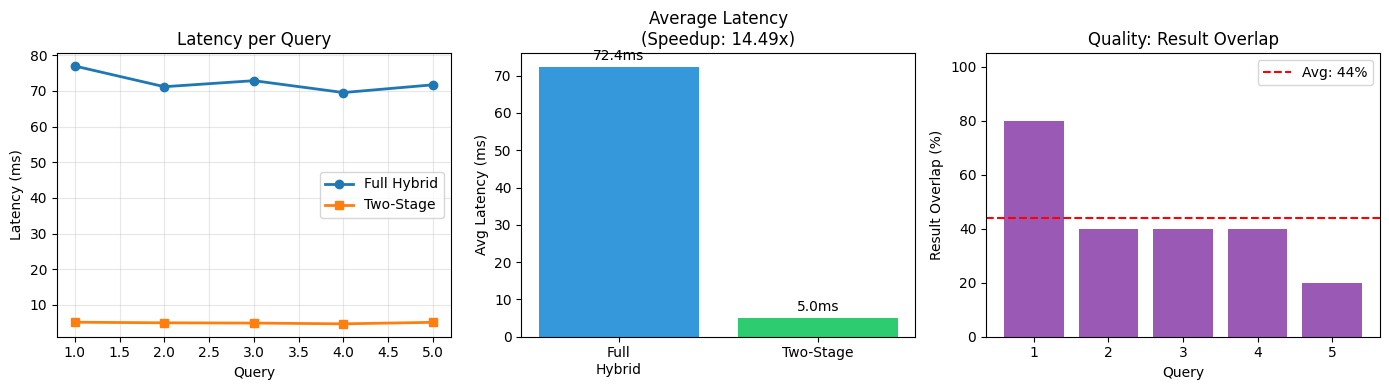


 Visualization saved!


In [ ]:
# ============================================================================
#  TWO-STAGE RETRIEVAL WITH STATIC EMBEDDINGS
# ============================================================================

!pip install gensim -q

import gensim.downloader as api
import numpy as np
import time
from sklearn.metrics.pairwise import cosine_similarity

print("="*70)
print("STEP 5B: TWO-STAGE RETRIEVAL SYSTEM")
print("="*70)

# ═══════════════════════════════════════════════════════════════════════════
# [1] LOAD STATIC EMBEDDINGS WITH RETRY LOGIC
# ═══════════════════════════════════════════════════════════════════════════

print("\n[1] Loading static embeddings...")

def load_glove_with_retry(model_name, max_retries=3):
    """Load GloVe model with retry logic for network issues"""
    for attempt in range(max_retries):
        try:
            print(f"  Attempt {attempt + 1}/{max_retries}: Loading '{model_name}'...")
            model = api.load(model_name)
            print(f"  ✓ Successfully loaded!")
            return model
        except Exception as e:
            print(f"  ✗ Attempt {attempt + 1} failed: {str(e)[:50]}...")
            if attempt < max_retries - 1:
                print(f"  Retrying in 5 seconds...")
                time.sleep(5)
    return None

# Try loading models in order of preference (smaller = more reliable)
glove_model = None

# Option 1: Try the 50-dim model first (smaller, faster download ~65MB)
print("\nTrying GloVe 50-dim (smaller, more reliable)...")
glove_model = load_glove_with_retry('glove-wiki-gigaword-50', max_retries=3)
glove_dim = 50

# Option 2: If 50-dim fails, try 100-dim
if glove_model is None:
    print("\nTrying GloVe 100-dim...")
    glove_model = load_glove_with_retry('glove-wiki-gigaword-100', max_retries=2)
    glove_dim = 100

# Option 3: Fallback to Word2Vec (different source)
if glove_model is None:
    print("\nTrying Word2Vec as fallback...")
    try:
        glove_model = api.load('word2vec-google-news-300')
        glove_dim = 300
        print("  Loaded Word2Vec 300-dim")
    except:
        print("  ✗ Word2Vec also failed")

# Option 4: Use TF-IDF based approach if all embedding downloads fail
if glove_model is None:
    print("\n All embedding downloads failed. Using TF-IDF for Stage 1 instead.")
    USE_TFIDF_STAGE1 = True
else:
    USE_TFIDF_STAGE1 = False
    print(f"\n Loaded static embeddings: {len(glove_model)} words, {glove_dim} dimensions")

# ═══════════════════════════════════════════════════════════════════════════
# [2] CREATE STATIC EMBEDDINGS FOR CHUNKS
# ═══════════════════════════════════════════════════════════════════════════

print("\n[2] Creating static embeddings for chunks...")

if not USE_TFIDF_STAGE1:
    def get_static_embedding(text, model, dim):
        """Create document embedding by averaging word vectors"""
        words = text.lower().split()
        vectors = []
        for word in words:
            if word in model:
                vectors.append(model[word])
        if vectors:
            return np.mean(vectors, axis=0)
        return np.zeros(dim)

    # Create static embeddings for all chunks
    print("  Creating embeddings for all chunks...")
    static_embeddings = np.array([
        get_static_embedding(chunk['text'], glove_model, glove_dim)
        for chunk in chunks
    ])

    # Normalize for cosine similarity
    norms = np.linalg.norm(static_embeddings, axis=1, keepdims=True)
    norms[norms == 0] = 1
    static_embeddings_norm = static_embeddings / norms

    print(f" Created static embeddings: {static_embeddings_norm.shape}")

    # Save
    np.save('/content/verdictvision_preprocessed/static_embeddings.npy', static_embeddings_norm)
    print("  Saved static_embeddings.npy")

else:
    # Use TF-IDF matrix as "static" stage 1 (already computed in Step 5)
    print("  Using TF-IDF matrix for Stage 1 filtering")
    static_embeddings_norm = None

# ═══════════════════════════════════════════════════════════════════════════
# [3] IMPLEMENT TWO-STAGE SEARCH FUNCTION
# ═══════════════════════════════════════════════════════════════════════════

print("\n[3] Implementing two-stage retrieval function...")

def two_stage_search(query, stage1_k=100, final_k=5,
                     semantic_weight=0.6,
                     keyword_weight=0.3,
                     metadata_weight=0.1):
    """
    Two-stage retrieval:
    Stage 1: Fast filtering (GloVe or TF-IDF) → top stage1_k candidates
    Stage 2: Precision reranking with transformer → top final_k results
    """

    print(f"\n{'='*70}")
    print(f"TWO-STAGE SEARCH: '{query}'")
    print(f"{'='*70}")

    # ========== STAGE 1: Fast Filtering ==========
    print(f"\n[Stage 1] Fast filtering (top {stage1_k})...")
    stage1_start = time.time()

    if USE_TFIDF_STAGE1:
        # Use TF-IDF for stage 1
        query_tfidf = vectorizer.transform([query])
        static_scores = cosine_similarity(query_tfidf, tfidf_matrix)[0]
    else:
        # Use GloVe for stage 1
        query_static = get_static_embedding(query, glove_model, glove_dim)
        query_static_norm = query_static / (np.linalg.norm(query_static) + 1e-10)
        static_scores = np.dot(static_embeddings_norm, query_static_norm)

    # Get top stage1_k candidates
    stage1_indices = np.argsort(static_scores)[::-1][:stage1_k]
    stage1_time = time.time() - stage1_start

    print(f" Stage 1 complete: {stage1_time*1000:.2f}ms")

    # ========== STAGE 2: Precision Reranking ==========
    print(f"\n[Stage 2] Reranking with transformer...")
    stage2_start = time.time()

    # Transformer embedding for query
    query_transformer = embedder.encode(query, normalize_embeddings=True)

    # Only compute for stage1 candidates
    candidate_transformer_embeddings = embeddings[stage1_indices]
    transformer_scores = np.dot(candidate_transformer_embeddings, query_transformer)

    # TF-IDF for candidates
    query_tfidf = vectorizer.transform([query])
    candidate_tfidf = tfidf_matrix[stage1_indices]
    keyword_scores = cosine_similarity(query_tfidf, candidate_tfidf)[0]

    # Metadata scores
    candidate_metadata = np.array([
        len(chunks[idx].get('citations', [])) for idx in stage1_indices
    ], dtype=float)
    if candidate_metadata.max() > 0:
        candidate_metadata /= candidate_metadata.max()

    # Weighted fusion
    final_scores = (semantic_weight * transformer_scores +
                   keyword_weight * keyword_scores +
                   metadata_weight * candidate_metadata)

    stage2_time = time.time() - stage2_start
    print(f" Stage 2 complete: {stage2_time*1000:.2f}ms")

    # ========== DEDUPLICATE BY CASE ==========
    case_best = {}
    for i, idx in enumerate(stage1_indices):
        case_id = chunks[idx].get('case_id', f"UNKNOWN_{idx}")
        score = final_scores[i]

        if case_id not in case_best or score > case_best[case_id]['score']:
            case_best[case_id] = {
                'score': score,
                'chunk_idx': idx,
                'case_name': chunks[idx]['case_name'],
                'court': chunks[idx]['court'],
                'citations': chunks[idx].get('citations', []),
                'outcome': chunks[idx]['outcome'],
                'text': chunks[idx]['text'],
                'transformer_score': transformer_scores[i],
                'keyword_score': keyword_scores[i],
                'static_score': static_scores[idx]
            }

    sorted_cases = sorted(case_best.values(), key=lambda x: x['score'], reverse=True)
    top_cases = sorted_cases[:final_k]

    total_time = stage1_time + stage2_time
    print(f"\n Total time: {total_time*1000:.2f}ms")
    print(f" Returning {len(top_cases)} unique cases")

    # Format results
    results = []
    for rank, case in enumerate(top_cases, 1):
        results.append({
            'rank': rank,
            'case_name': case['case_name'],
            'court': case['court'],
            'citations': case['citations'],
            'outcome': case['outcome'],
            'text_snippet': case['text'][:400],
            'scores': {
                'final': float(case['score']),
                'transformer': float(case['transformer_score']),
                'keyword': float(case['keyword_score']),
                'static': float(case['static_score'])
            },
            'timing': {
                'stage1_ms': stage1_time * 1000,
                'stage2_ms': stage2_time * 1000,
                'total_ms': total_time * 1000
            }
        })

    return results

print(" Two-stage search function ready")

# ═══════════════════════════════════════════════════════════════════════════
# [4] BENCHMARK: TWO-STAGE vs FULL HYBRID
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*70)
print("BENCHMARKING: TWO-STAGE vs FULL HYBRID SEARCH")
print("="*70)

test_queries = [
    "breach of contract damages California",
    "negligence standard of care duty",
    "premises liability slip and fall",
    "employment wrongful termination",
    "fraud misrepresentation elements"
]

full_hybrid_times = []
two_stage_times = []
overlap_scores = []

print("\nRunning benchmark on 5 test queries...\n")

for i, query in enumerate(test_queries, 1):
    print(f"Query {i}: '{query[:40]}...'")

    # Full hybrid search timing
    start = time.time()
    full_results = hybrid_search(query, top_k=5)
    full_time = time.time() - start
    full_hybrid_times.append(full_time)

    # Two-stage search timing
    start = time.time()
    two_stage_results = two_stage_search(query, stage1_k=100, final_k=5)
    two_stage_time = time.time() - start
    two_stage_times.append(two_stage_time)

    # Calculate overlap
    full_cases = set([r['case_name'] for r in full_results])
    two_stage_cases = set([r['case_name'] for r in two_stage_results])
    overlap = len(full_cases & two_stage_cases) / 5
    overlap_scores.append(overlap)

    print(f"  Full: {full_time*1000:.1f}ms | Two-Stage: {two_stage_time*1000:.1f}ms | Overlap: {overlap*100:.0f}%\n")

# Summary
print("="*70)
print("BENCHMARK SUMMARY")
print("="*70)

avg_full = np.mean(full_hybrid_times) * 1000
avg_two_stage = np.mean(two_stage_times) * 1000
speedup = avg_full / avg_two_stage if avg_two_stage > 0 else 1

print(f"\n{'Metric':<25} {'Full Hybrid':>15} {'Two-Stage':>15}")
print("-" * 55)
print(f"{'Avg Latency':<25} {avg_full:>12.1f} ms {avg_two_stage:>12.1f} ms")
print(f"{'Speedup':<25} {'1.0x':>15} {speedup:>14.2f}x")
print(f"{'Avg Result Overlap':<25} {'100%':>15} {np.mean(overlap_scores)*100:>14.0f}%")

print(f"\n{'='*70}")
print("Step 5B Complete!")
print(f"{'='*70}")

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION
# ═══════════════════════════════════════════════════════════════════════════

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot 1: Latency per query
ax1 = axes[0]
x = range(1, len(test_queries) + 1)
ax1.plot(x, [t*1000 for t in full_hybrid_times], 'o-', label='Full Hybrid', linewidth=2)
ax1.plot(x, [t*1000 for t in two_stage_times], 's-', label='Two-Stage', linewidth=2)
ax1.set_xlabel('Query')
ax1.set_ylabel('Latency (ms)')
ax1.set_title('Latency per Query')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Average Comparison
ax2 = axes[1]
methods = ['Full\nHybrid', 'Two-Stage']
times = [avg_full, avg_two_stage]
colors = ['#3498db', '#2ecc71']
bars = ax2.bar(methods, times, color=colors)
ax2.set_ylabel('Avg Latency (ms)')
ax2.set_title(f'Average Latency\n(Speedup: {speedup:.2f}x)')
for bar, t in zip(bars, times):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{t:.1f}ms', ha='center', va='bottom', fontsize=10)

# Plot 3: Quality (Overlap)
ax3 = axes[2]
ax3.bar(range(1, len(overlap_scores)+1), [o*100 for o in overlap_scores], color='#9b59b6')
ax3.axhline(y=np.mean(overlap_scores)*100, color='red', linestyle='--',
            label=f'Avg: {np.mean(overlap_scores)*100:.0f}%')
ax3.set_xlabel('Query')
ax3.set_ylabel('Result Overlap (%)')
ax3.set_title('Quality: Result Overlap')
ax3.set_ylim(0, 105)
ax3.legend()

plt.tight_layout()
plt.savefig('/content/verdictvision_preprocessed/two_stage_benchmark.png', dpi=150)
plt.show()

print("\n Visualization saved!")

In [ ]:
for r in results:
    print("====", r["case_name"])
    print(r["text_snippet"])
    print()


==== David BEVIS et al., Plaintiffs and Appellants, v. TERRACE VIEW PARTNERS, LP, et al., Defendants and Appellants. David Bevis et al., Plaintiffs and Respondents, v. Terrace View Partners, LP, et al., Defendants and Appellants.
the Park as set forth herein in paragraphs 12 and 13, by interfering with Plaintiffs' ability to sell their mobilehomes in place[,] including by raising rents to unreasonably high levels , by illegally changing the use of the Park, and by Defendants' other actions and conduct alleged in this Complaint." (Italics added.) The court instructed the jury along the line of plaintiffs' primary nuisance t

==== Sharmalee GOONEWARDENE, Plaintiff and Appellant, v. ADP, LLC, et al., Defendants and Respondents.
and plaintiff's alleged failure to receive the wages she was due is unrelated to this promised benefit. Accordingly, although the Court of Appeal accurately observed that a third party's rights under the third party beneficiary doctrine may arise under an oral as w

#Step 10: COMPLETE VERDICTVISION APP (Q&A + IRAC DRAFTING + OUTCOME PREDICTION)

In [ ]:
# ============================================================================
# COMPLETE VERDICTVISION APP (Q&A + IRAC DRAFTING + OUTCOME PREDICTION)
# Includes: LLM loading, Q&A system, IRAC drafting, LLM outcome prediction,
#           unified Gradio UI
# ============================================================================

import gradio as gr
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import torch
from collections import Counter
import time

print("="*70)
print("INITIALIZING COMPLETE VERDICTVISION APP")
print("="*70)

# ═══════════════════════════════════════════════════════════════════════════
# [1] LOAD LLM (Phi-2)
# ═══════════════════════════════════════════════════════════════════════════

print("\n[1] Loading LLM (Microsoft Phi-2)...")

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# Check GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"  Device: {device}")

# Load Phi-2 model
model_name = "microsoft/phi-2"

print(f"  Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

print(f"  Loading model (this may take 1-2 minutes)...")
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    device_map="auto" if device == "cuda" else None,
    trust_remote_code=True
)

# Create pipeline
llm_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=150,
    do_sample=True,
    temperature=0.7,
    top_p=0.9,
    pad_token_id=tokenizer.eos_token_id
)

print(f" LLM loaded successfully!")

# ═══════════════════════════════════════════════════════════════════════════
# [2/4] DEFINE Q&A SYSTEM CLASS (your existing logic, unchanged)
# ═══════════════════════════════════════════════════════════════════════════

print("\n[2] Defining Q&A system class...")

class VerdictVisionQA:
    """Fixed Q&A system with correct embedding handling"""

    def __init__(self, llm):
        self.llm = llm
        self.embedder = embedder  # From Step 5
        self.embeddings = embeddings  # From Step 5
        self.chunks = chunks
        self.vectorizer = vectorizer
        self.tfidf_matrix = tfidf_matrix
        print(f"  Q&A initialized with {len(chunks)} chunks")
        print(f"  Embedding shape: {self.embeddings.shape}")

    def retrieve_cases(self, query, top_k=3):
        """RAG: Hybrid search (60/30/10)"""

        #  embedding - no [0] indexing
        query_emb = self.embedder.encode(query, normalize_embeddings=True)
        # query_emb shape is (384,) for all-MiniLM-L6-v2

        # Compute semantic similarity
        semantic_scores = cosine_similarity(
            query_emb.reshape(1, -1),  # (1, 384)
            self.embeddings             # (n_chunks, 384)
        )[0]

        # Keyword (TF-IDF)
        query_tfidf = self.vectorizer.transform([query])
        keyword_scores = cosine_similarity(query_tfidf, self.tfidf_matrix)[0]

        # Metadata
        metadata_scores = np.array([
            0.5 if c.get('citations') else 0.0 for c in self.chunks
        ])
        if metadata_scores.max() > 0:
            metadata_scores /= metadata_scores.max()

        # Fusion (60% semantic, 30% keyword, 10% metadata)
        final_scores = 0.6 * semantic_scores + 0.3 * keyword_scores + 0.1 * metadata_scores

        # Top-k
        top_indices = np.argsort(final_scores)[::-1][:top_k]

        results = []
        for idx in top_indices:
            results.append({
                'case_name': self.chunks[idx]['case_name'],
                'court': self.chunks[idx]['court'],
                'citations': self.chunks[idx].get('citations', []),
                'outcome': self.chunks[idx]['outcome'],
                'text': self.chunks[idx]['text'][:500],
                'score': float(final_scores[idx])
            })

        return results

    def generate_answer(self, question, cases):
        """Generate answer with LLM"""
        prompt = "You are a legal assistant. Answer based on these California cases.\n\n"

        for i, case in enumerate(cases, 1):
            prompt += f"Case {i}: {case['case_name']}\n"
            prompt += f"Court: {case['court']}\n"
            prompt += f"Key text: {case['text'][:200]}...\n\n"

        prompt += f"Question: {question}\n\nAnswer (cite cases):"

        try:
            output = self.llm(prompt, max_new_tokens=150, return_full_text=False)
            answer = output[0]['generated_text'].strip()
            answer = answer.split('\n')[0]
            if len(answer) < 30:
                answer = f"Based on {cases[0]['case_name']}, " + answer
            return answer
        except Exception as e:
            print(f"LLM Error: {e}")
            return f"Based on {cases[0]['case_name']}, the California courts have addressed this issue."

    def format_response(self, answer, cases):
        """Format with citations"""
        result = f"**💬 Answer:**\n\n{answer}\n\n"
        result += "---\n\n"
        result += f"**📚 Sources ({len(cases)} Cases):**\n\n"

        for i, case in enumerate(cases, 1):
            result += f"**{i}. {case['case_name']}**\n"
            result += f"   • Court: {case['court']}\n"
            if case['citations']:
                result += f"   • Citation: {case['citations'][0]}\n"
            result += f"   • Outcome: {case['outcome']}\n"
            result += f"   • Relevance: {case['score']:.1%}\n\n"

        return result

    def answer_question(self, question):
        """Complete Q&A pipeline"""
        print(f"\n{'='*60}")
        print(f"User: {question}")

        print("[1] RAG retrieval...")
        cases = self.retrieve_cases(question, top_k=3)

        print("[2] LLM generation...")
        answer = self.generate_answer(question, cases)

        print("[3] Adding citations...")
        result = self.format_response(answer, cases)

        print("Complete\n")
        return result

    def respond(self, user_message, chat_history):
        """Gradio chatbot respond function"""
        if not user_message.strip():
            return "", chat_history

        try:
            answer = self.answer_question(user_message)
            chat_history.append((user_message, answer))
            return "", chat_history
        except Exception as e:
            error_msg = f" Error: {str(e)}\n\nPlease try rephrasing your question."
            chat_history.append((user_message, error_msg))
            return "", chat_history


# ═══════════════════════════════════════════════════════════════════════════
#  DEFINE IRAC DRAFTING ASSISTANT CLASS (using hybrid_search from Step 5)
# ═══════════════════════════════════════════════════════════════════════════

print("\n Defining IRAC drafting assistant class")

class VerdictVisionDraftingIRAC:
    """
    Drafting assistant for:
      - Case briefs
      - Legal memos
      - Motions / arguments

    Uses:
      - hybrid_search (Step 5) for retrieval
      - llm_pipeline (Phi-2) for generation
    """

    def __init__(self, llm):
        self.llm = llm
        self.chunks = chunks
        print("  ✓ IRAC drafting assistant initialized")

    # ---------------- Retrieval ---------------- #

    def retrieve_supporting_cases(self, description, top_k=5):
        """
        Use the case description as a query into the hybrid retriever.
        Returns top_k supporting cases.
        """
        query = f"facts: {description}"
        results = hybrid_search(query, top_k=top_k)  # assumes hybrid_search from Step 5

        cases = []
        for r in results:
            cases.append({
                "case_name": r["case_name"],
                "court": r["court"],
                "citations": r.get("citations", []),
                "outcome": r.get("outcome", "unknown"),
                "text_snippet": r.get("text_snippet", r.get("text", "")),
                "score": float(r["scores"]["final"])
            })
        return cases

    # ---------------- Prompt Building ---------------- #

    def build_prompt(self, description, doc_type, tone, cases, max_new_tokens):
        """
        Build the LLM prompt for IRAC-style drafting with APA-style citations.
        Includes the selected document type explicitly.
        """

        tone_map = {
            "Neutral / Objective": "neutral, objective, and analytical",
            "Persuasive / Advocacy": "persuasive and advocacy-oriented, but still professional",
            "Plain-language summary": "plain language suitable for a non-lawyer client"
        }
        tone_instruction = tone_map.get(tone, "neutral, objective, and analytical")

        prompt = (
            "You are a California legal writing assistant.\n"
            "Draft a legal document using IRAC format (FACTS, ISSUE, RULE, ANALYSIS, CONCLUSION)\n"
            "based on the CASE DESCRIPTION and SUPPORTING CASES below.\n\n"
            f"REQUESTED DOCUMENT TYPE: {doc_type}\n"
            f"TONE: {tone_instruction}\n\n"
            "CASE DESCRIPTION (provided by the user):\n"
            f"{description}\n\n"
            "SUPPORTING CASES (for legal context; you may cite them in the ANALYSIS):\n"
        )

        # IMPORTANT: truncate excerpts so the prompt isn’t huge (helps avoid CUDA OOM)
        for i, case in enumerate(cases, 1):
            excerpt = case["text_snippet"][:400]  # truncate to ~400 chars
            prompt += f"Case {i}: {case['case_name']}\n"
            prompt += f"  Court: {case['court']}\n"
            if case["citations"]:
                prompt += f"  Citation: {case['citations'][0]}\n"
            prompt += f"  Outcome: {case['outcome']}\n"
            prompt += f"  Excerpt: {excerpt}...\n\n"

        prompt += (
            "DRAFTING INSTRUCTIONS (MANDATORY):\n"
            "1. Structure the document using EXACTLY these headings, in all caps:\n"
            "   FACTS\n"
            "   ISSUE\n"
            "   RULE\n"
            "   ANALYSIS\n"
            "   CONCLUSION\n"
            "2. In the FACTS section, summarize the key facts from the case description.\n"
            "3. In the ISSUE section, state the central legal question as a single, clear sentence.\n"
            "4. In the RULE section, state the relevant California legal standard(s).\n"
            "5. In the ANALYSIS section:\n"
            "   - Apply the rule to the specific facts.\n"
            "   - Refer to supporting cases using APA-style parenthetical citations.\n"
            "   - Example format: (Omlansky v. Save Mart Supermarkets, 2019).\n"
            "6. In the CONCLUSION section, provide a brief, reasoned conclusion "
            "about how the court is likely to view the claim.\n"
            "7. Do NOT include a separate 'Sources', 'References', or 'Supporting Cases' section "
            "inside the draft. That will be provided separately.\n"
            "8. Use clear, complete sentences and organized paragraphs. Avoid bullet points.\n\n"
            "NOW WRITE THE DRAFT, USING ONLY THE IRAC HEADINGS (FACTS, ISSUE, RULE, ANALYSIS, CONCLUSION):\n"
        )

        return prompt

    # ---------------- Draft Generation ---------------- #

    def generate_draft(self, description, doc_type, tone, approx_length_tokens):
        """
        High-level function: retrieve cases, build prompt, call LLM, format result.
        Returns:
          - draft_text (IRAC-only, with doc_type as a heading)
          - sources_text (supporting cases list)
        """
        description = (description or "").strip()
        if not description:
            return "Please provide a case description.", ""

        # 1. Retrieve supporting cases
        print("\n" + "="*60)
        print("DRAFTING REQUEST")
        print(f"Document type: {doc_type}")
        print(f"Tone: {tone}")
        print("[1/3] Retrieving supporting cases...")
        cases = self.retrieve_supporting_cases(description, top_k=5)

        # 2. Build prompt
        print("[2/3] Building IRAC + APA prompt...")

        # Make generation lighter to avoid CUDA OOM: cap at 256 tokens
        max_new_tokens = int(min(max(approx_length_tokens, 128), 256))

        prompt = self.build_prompt(description, doc_type, tone, cases, max_new_tokens)

        # 3. Call LLM (with basic CUDA OOM fallback)
        print("[3/3] Generating draft with LLM...")
        try:
            output = self.llm(
                prompt,
                max_new_tokens=max_new_tokens,
                return_full_text=False
            )
            generated = output[0]["generated_text"].strip()
        except RuntimeError as e:
            if "CUDA out of memory" in str(e):
                print(" CUDA OOM during drafting. Retrying with fewer tokens (128).")
                try:
                    output = self.llm(
                        prompt,
                        max_new_tokens=128,
                        return_full_text=False
                    )
                    generated = output[0]["generated_text"].strip()
                except Exception as e2:
                    generated = f"Error during generation after CUDA OOM retry: {e2}"
            else:
                generated = f"Error during generation: {e}"
        except Exception as e:
            generated = f"Error during generation: {e}"

        # Prepend the selected document type to the draft so it's obvious
        draft = f"# {doc_type}\n\n" + generated

        # Build sources text for the UI (separate from draft)
        sources_lines = []
        for i, case in enumerate(cases, 1):
            line = f"{i}. {case['case_name']} ({case['court']})"
            if case["citations"]:
                line += f"\n   Citation: {case['citations'][0]}"
            line += f"\n   Outcome: {case['outcome']}"
            line += f"\n   Relative score (0–1): {case['score']:.3f}\n"
            sources_lines.append(line)

        sources_text = "\n".join(sources_lines)

        print("Drafting complete.\n")
        return draft, sources_text


# ═══════════════════════════════════════════════════════════════════════════
# LLM-BASED OUTCOME PREDICTION
# ═══════════════════════════════════════════════════════════════════════════

print("\n Defining LLM-based outcome predictor...")

class LLMOutcomePredictor:
    """
    LLM-based outcome prediction using RAG + reasoning.

    Advantages over ML classifier:
    1. Provides explainable reasoning
    2. Leverages semantic understanding of legal concepts
    3. Uses retrieved precedents for context
    4. No separate training required
    """

    def __init__(self, llm, retriever_fn):
        self.llm = llm
        self.retrieve = retriever_fn
        print("  ✓ LLM Outcome Predictor initialized")

    def predict(self, case_description, num_similar=5):
        """
        Predict case outcome using LLM reasoning over retrieved precedents.

        Returns:
            dict with prediction, confidence, reasoning, and supporting cases
        """

        # Step 1: Retrieve similar cases
        print("\n[1/3] Retrieving similar precedents...")
        start_time = time.time()
        similar_cases = self.retrieve(case_description, top_k=num_similar)
        retrieval_time = time.time() - start_time

        # Step 2: Analyze outcome distribution
        outcomes = [c.get('outcome', 'unknown').lower() for c in similar_cases]
        outcome_dist = Counter(outcomes)

        # Step 3: Build reasoning prompt
        print("[2/3] Building reasoning prompt...")
        prompt = self._build_prompt(case_description, similar_cases, outcome_dist)

        # Step 4: Get LLM prediction
        print("[3/3] Generating prediction with LLM reasoning...")
        start_time = time.time()

        try:
            output = self.llm(prompt, max_new_tokens=200, return_full_text=False)
            response = output[0]['generated_text'].strip()
            llm_time = time.time() - start_time

            # Parse the response
            prediction, confidence, reasoning = self._parse_response(response, outcome_dist)

        except Exception as e:
            print(f"  ⚠ LLM error: {e}")
            llm_time = 0
            # Fallback to majority voting
            prediction = outcome_dist.most_common(1)[0][0] if outcome_dist else "affirmed"
            confidence = "medium"
            reasoning = "Prediction based on majority outcome of similar cases (LLM fallback)."

        return {
            'prediction': prediction.upper(),
            'confidence': confidence,
            'reasoning': reasoning,
            'similar_cases': similar_cases,
            'outcome_distribution': dict(outcome_dist),
            'retrieval_time_ms': retrieval_time * 1000,
            'llm_time_ms': llm_time * 1000
        }

    def _build_prompt(self, description, cases, outcome_dist):
        """Build structured prompt for LLM reasoning"""

        prompt = """You are an experienced California appellate court analyst.
Analyze the case below and predict the most likely appellate outcome.

═══════════════════════════════════════════════════════════════════
CASE FACTS TO ANALYZE:
═══════════════════════════════════════════════════════════════════
"""
        prompt += description[:600] + "\n\n"

        prompt += """═══════════════════════════════════════════════════════════════════
SIMILAR PRECEDENT CASES:
═══════════════════════════════════════════════════════════════════
"""
        for i, case in enumerate(cases[:5], 1):
            prompt += f"\n{i}. {case.get('case_name', 'Unknown Case')[:80]}\n"
            prompt += f"   Outcome: {case.get('outcome', 'unknown')}\n"
            prompt += f"   Key facts: {case.get('text', '')[:150]}...\n"

        prompt += f"""
═══════════════════════════════════════════════════════════════════
OUTCOME DISTRIBUTION OF SIMILAR CASES:
═══════════════════════════════════════════════════════════════════
"""
        for outcome, count in outcome_dist.most_common():
            prompt += f"  • {outcome}: {count} case(s)\n"

        prompt += """
═══════════════════════════════════════════════════════════════════
INSTRUCTIONS:
═══════════════════════════════════════════════════════════════════
Based on the case facts and similar precedents:

1. Identify the key legal issues
2. Compare with precedent outcomes
3. Predict the outcome: AFFIRMED, REVERSED, or REMANDED

Respond in this EXACT format:
PREDICTION: [AFFIRMED/REVERSED/REMANDED]
CONFIDENCE: [HIGH/MEDIUM/LOW]
REASONING: [2-3 sentences explaining your analysis]
"""
        return prompt

    def _parse_response(self, response, outcome_dist):
        """Parse structured response from LLM"""

        prediction = "affirmed"  # default
        confidence = "medium"
        reasoning = response

        lines = response.split('\n')
        for line in lines:
            line_lower = line.lower().strip()

            if line_lower.startswith('prediction:'):
                pred_text = line.split(':', 1)[-1].strip().lower()
                if 'affirm' in pred_text:
                    prediction = 'affirmed'
                elif 'reverse' in pred_text:
                    prediction = 'reversed'
                elif 'remand' in pred_text:
                    prediction = 'remanded'

            elif line_lower.startswith('confidence:'):
                conf_text = line.split(':', 1)[-1].strip().lower()
                if 'high' in conf_text:
                    confidence = 'high'
                elif 'low' in conf_text:
                    confidence = 'low'
                else:
                    confidence = 'medium'

            elif line_lower.startswith('reasoning:'):
                reasoning = line.split(':', 1)[-1].strip()

        return prediction, confidence, reasoning


print("\n[2.7/4] Creating retrieval function for predictor...")

def retrieve_for_prediction(query, top_k=5):
    """Wrapper for simple hybrid search used in outcome prediction"""
    query_emb = embedder.encode(query, normalize_embeddings=True)
    semantic_scores = cosine_similarity(query_emb.reshape(1, -1), embeddings)[0]

    query_tfidf = vectorizer.transform([query])
    keyword_scores = cosine_similarity(query_tfidf, tfidf_matrix)[0]

    final_scores = 0.6 * semantic_scores + 0.3 * keyword_scores + 0.1 * 0

    case_best = {}
    for idx, score in enumerate(final_scores):
        case_id = chunks[idx].get('case_id', f"UNK_{idx}")
        if case_id not in case_best or score > case_best[case_id]['score']:
            case_best[case_id] = {
                'score': float(score),
                'case_name': chunks[idx]['case_name'],
                'text': chunks[idx]['text'][:400],
                'outcome': chunks[idx].get('outcome', 'unknown'),
                'court': chunks[idx].get('court', ''),
                'citations': chunks[idx].get('citations', [])
            }

    sorted_results = sorted(case_best.values(), key=lambda x: x['score'], reverse=True)
    return sorted_results[:top_k]

print(" Initializing LLM predictor...")
llm_predictor = LLMOutcomePredictor(llm_pipeline, retrieve_for_prediction)

def predict_ui(case_description, num_cases):
    """Gradio UI wrapper for outcome prediction"""
    if not case_description.strip():
        return "Please enter a case description.", "", ""

    result = llm_predictor.predict(case_description, num_similar=int(num_cases))

    # Format prediction output
    pred_text = f"""
## 🎯 Predicted Outcome: **{result['prediction']}**

**Confidence:** {result['confidence'].upper()}

**Processing Time:**
- Retrieval: {result['retrieval_time_ms']:.0f} ms
- LLM Reasoning: {result['llm_time_ms']:.0f} ms
"""

    # Format reasoning
    reason_text = f"""
### 📝 LLM Reasoning

{result['reasoning']}

### 📊 Similar Case Outcomes
"""
    for outcome, count in result['outcome_distribution'].items():
        reason_text += f"- **{outcome}**: {count} case(s)\n"

    # Format similar cases
    cases_text = "### 📚 Supporting Precedents\n\n"
    for i, case in enumerate(result['similar_cases'], 1):
        cases_text += f"**{i}. {case['case_name'][:70]}...**\n"
        cases_text += f"- Outcome: {case['outcome']}\n"
        cases_text += f"- Relevance Score: {case['score']:.3f}\n\n"

    return pred_text, reason_text, cases_text


# ═══════════════════════════════════════════════════════════════════════════
# [3/4] INITIALIZE BOTH SYSTEMS
# ═══════════════════════════════════════════════════════════════════════════

print("\n[3/4] Initializing systems...")
qa_system = VerdictVisionQA(llm_pipeline)
drafting_system_irac = VerdictVisionDraftingIRAC(llm_pipeline)

# Quick test for Q&A
print("\n  Testing Q&A retrieval...")
test_result = qa_system.retrieve_cases("breach of contract", top_k=3)
print(f"  ✓ Retrieved {len(test_result)} cases successfully!")
print(f"  ✓ First case: {test_result[0]['case_name'][:60]}...")


# ═══════════════════════════════════════════════════════════════════════════
# [4/4] UNIFIED GRADIO UI WITH THREE TABS
# ═══════════════════════════════════════════════════════════════════════════

print("\n[4/4] Building unified Gradio interface (Q&A + IRAC + Prediction)...")

examples = [
    "What are the requirements for breach of contract?",
    "What constitutes negligence in California?",
    "What are the elements of fraud?",
    "Can employers terminate without cause?",
    "What damages are available for breach?",
    "What is the statute of limitations for breach of contract in California?"
]

with gr.Blocks(title="VerdictVision: Legal Research & Drafting", theme=gr.themes.Soft()) as app:

    gr.Markdown("""
    # ⚖️ VerdictVision: AI Legal Research & Drafting Assistant

    **Tab 1 – Q&A Assistant:** Ask legal questions and get answers with case citations.
    **Tab 2 – IRAC Drafting Assistant:** Generate structured IRAC drafts with APA-style case references.
    **Tab 3 – Outcome Prediction:** LLM-based appellate outcome prediction with reasoning and precedents.
    """)

    with gr.Tabs():

        # ---------------- TAB 1: Q&A ----------------
        with gr.Tab("📘 Q&A Assistant"):

            gr.Markdown("""
            ## 💬 Legal Q&A with Hybrid RAG

            Ask questions about California appellate law.
            Retrieval uses a hybrid of semantic embeddings, TF-IDF keywords, and metadata (60/30/10).
            """)

            with gr.Row():
                with gr.Column(scale=3):
                    chatbot_ui = gr.Chatbot(
                        label="Legal Q&A",
                        height=500,
                        avatar_images=(None, "⚖️")
                    )

                    with gr.Row():
                        msg = gr.Textbox(
                            label="Your Question",
                            placeholder="E.g., What are breach of contract requirements?",
                            lines=2,
                            scale=4
                        )
                        send = gr.Button("Ask", variant="primary", scale=1)

                    clear = gr.Button("Clear", size="sm")

                with gr.Column(scale=1):
                    gr.Markdown("""
                    ### 🎯 System

                    **RAG Retrieval:**
                    - Semantic: all-MiniLM-L6-v2
                    - Keyword: TF-IDF
                    - Weighted fusion (60/30/10)

                    **LLM Generation:**
                    - Microsoft Phi-2
                    - Context-aware answers

                    **Citations:**
                    - Case names
                    - Court info
                    - Relevance scores
                    """)

            gr.Markdown("### 💡 Example Questions")
            gr.Examples(
                examples=examples,
                inputs=msg
            )

            send.click(
                qa_system.respond,
                inputs=[msg, chatbot_ui],
                outputs=[msg, chatbot_ui]
            )

            msg.submit(
                qa_system.respond,
                inputs=[msg, chatbot_ui],
                outputs=[msg, chatbot_ui]
            )

            clear.click(
                lambda: ("", []),
                outputs=[msg, chatbot_ui]
            )

        # ---------------- TAB 2: IRAC DRAFTING ----------------
        with gr.Tab("📝 IRAC Drafting Assistant"):

            gr.Markdown("""
            ## 📝 IRAC Drafting (with APA-style Citations)

            Provide a case description and generate a structured IRAC draft:
            - FACTS
            - ISSUE
            - RULE
            - ANALYSIS (with APA-style case references)
            - CONCLUSION
            """)

            with gr.Row():
                with gr.Column(scale=2):
                    case_desc = gr.Textbox(
                        label="Case Description",
                        placeholder=(
                            "Describe the case facts, posture, and what you want to argue.\n"
                            "Example: Plaintiff slipped and fell inside a grocery store after stepping on a puddle..."
                        ),
                        lines=10
                    )

                    doc_type = gr.Dropdown(
                        label="Document Type",
                        choices=[
                            "Case brief",
                            "Legal memorandum",
                            "Motion to dismiss (argument section)",
                            "Motion for summary judgment (argument section)",
                            "General argument / analysis"
                        ],
                        value="Case brief"
                    )

                    tone = gr.Dropdown(
                        label="Tone",
                        choices=[
                            "Neutral / Objective",
                            "Persuasive / Advocacy",
                            "Plain-language summary"
                        ],
                        value="Neutral / Objective"
                    )

                    length_slider = gr.Slider(
                        label="Approximate draft length (tokens)",
                        minimum=200,
                        maximum=700,
                        value=400,
                        step=50
                    )

                    generate_btn = gr.Button("Generate IRAC Draft", variant="primary")

                with gr.Column(scale=3):
                    draft_output = gr.Markdown(label="Drafted Document (IRAC + APA-style citations)")
                    sources_output = gr.Markdown(label="Supporting Cases Used (for reference)")

            generate_btn.click(
                fn=drafting_system_irac.generate_draft,
                inputs=[case_desc, doc_type, tone, length_slider],
                outputs=[draft_output, sources_output]
            )

        # ---------------- TAB 3: OUTCOME PREDICTION ----------------
        with gr.Tab("🔮 Outcome Prediction"):

            gr.Markdown("""
            ## 🔮 LLM-Powered Outcome Prediction

            Enter case facts to get an AI-reasoned prediction of the likely appellate outcome.
            This replaces a traditional ML classifier with LLM reasoning + RAG.
            """)

            with gr.Row():
                with gr.Column(scale=2):
                    case_input = gr.Textbox(
                        label="📋 Case Description",
                        placeholder=(
                            "Enter the facts of your case...\n\n"
                            "Example: The trial court granted summary judgment in favor of defendant landlord.\n"
                            "Plaintiff tenant appeals, arguing the court erred in finding no triable issue of\n"
                            "material fact regarding the landlord's knowledge of the dangerous condition\n"
                            "that caused plaintiff's injury."
                        ),
                        lines=10
                    )

                    num_cases_slider = gr.Slider(
                        minimum=3,
                        maximum=10,
                        value=5,
                        step=1,
                        label="Number of similar cases to analyze"
                    )

                    predict_btn = gr.Button("🔮 Predict Outcome", variant="primary")

                with gr.Column(scale=2):
                    prediction_output = gr.Markdown(label="Prediction")
                    reasoning_output = gr.Markdown(label="Reasoning")

            cases_output = gr.Markdown(label="Similar Cases")

            predict_btn.click(
                predict_ui,
                inputs=[case_input, num_cases_slider],
                outputs=[prediction_output, reasoning_output, cases_output]
            )

            gr.Markdown("---")
            gr.Markdown("### 💡 Example Cases")

            gr.Examples(
                examples=[
                    ["""Plaintiff slipped and fell on a wet floor in defendant's grocery store.
The store had placed warning signs, but plaintiff claims they were inadequate.
Trial court granted summary judgment for defendant. Plaintiff appeals.""", 5],

                    ["""Employee was terminated after reporting safety violations to OSHA.
Employer claims termination was for poor performance documented over 6 months.
Trial court found for employer. Employee appeals claiming wrongful termination.""", 5],

                    ["""Contractor abandoned construction project after receiving 80% payment.
Homeowner sued for breach of contract. Trial court awarded full damages.
Contractor appeals claiming impossibility of performance due to permit delays.""", 5],
                ],
                inputs=[case_input, num_cases_slider]
            )

print("\n" + "="*70)
print("LAUNCHING UNIFIED VERDICTVISION APP")
print("="*70)
app.launch(share=True, debug=True)


INITIALIZING COMPLETE VERDICTVISION APP

[1] Loading LLM (Microsoft Phi-2)...
  Device: cuda
  Loading tokenizer...
  Loading model (this may take 1-2 minutes)...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


 LLM loaded successfully!

[2] Defining Q&A system class...

 Defining IRAC drafting assistant class

 Defining LLM-based outcome predictor...

[2.7/4] Creating retrieval function for predictor...
 Initializing LLM predictor...
  ✓ LLM Outcome Predictor initialized

[3/4] Initializing systems...
  Q&A initialized with 11477 chunks
  Embedding shape: (11477, 256)
  ✓ IRAC drafting assistant initialized

  Testing Q&A retrieval...
  ✓ Retrieved 3 cases successfully!
  ✓ First case: David BEVIS et al., Plaintiffs and Appellants, v. TERRACE VI...

[4/4] Building unified Gradio interface (Q&A + IRAC + Prediction)...

LAUNCHING UNIFIED VERDICTVISION APP
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cef002822a240331b4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory 


User: What are the requirements for breach of contract?
[1] RAG retrieval...
[2] LLM generation...
[3] Adding citations...
Complete

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://cef002822a240331b4.gradio.live


# Step 11 : COMPREHENSIVE EVALUATION & TESTING SUITE FOR VERDICTVISION

In [ ]:
# Check embedding shape
test_emb = embedder.encode("test query", normalize_embeddings=True)
print(f"Embedding shape: {test_emb.shape}")
print(f"Embedding dimensions: {test_emb.shape[-1]}")

Embedding shape: (256,)
Embedding dimensions: 256


VERDICTVISION: COMPREHENSIVE EVALUATION SUITE

SECTION 1: RETRIEVAL SYSTEM EVALUATION

Evaluation dataset: 10 legal queries

Running retrieval evaluation...
  Evaluating: Semantic Only
  Evaluating: Hybrid (60/30/10)
  Evaluating: Two-Stage

TABLE 1: RETRIEVAL PERFORMANCE COMPARISON
+-------------------+-------+--------+-------+-----------+---------------+-------+
| Method            |   P@5 |   P@10 |   MRR |   NDCG@10 |   Latency(ms) |   QPS |
+===================+=======+========+=======+===========+===============+=======+
| Semantic Only     |  0.54 |   0.47 | 0.517 |     0.685 |          26.9 |  37.1 |
+-------------------+-------+--------+-------+-----------+---------------+-------+
| Hybrid (60/30/10) |  0.66 |   0.6  | 0.75  |     0.776 |          78.9 |  12.7 |
+-------------------+-------+--------+-------+-----------+---------------+-------+
| Two-Stage         |  0.66 |   0.6  | 0.75  |     0.776 |          88.6 |  11.3 |
+-------------------+-------+--------+-------+------

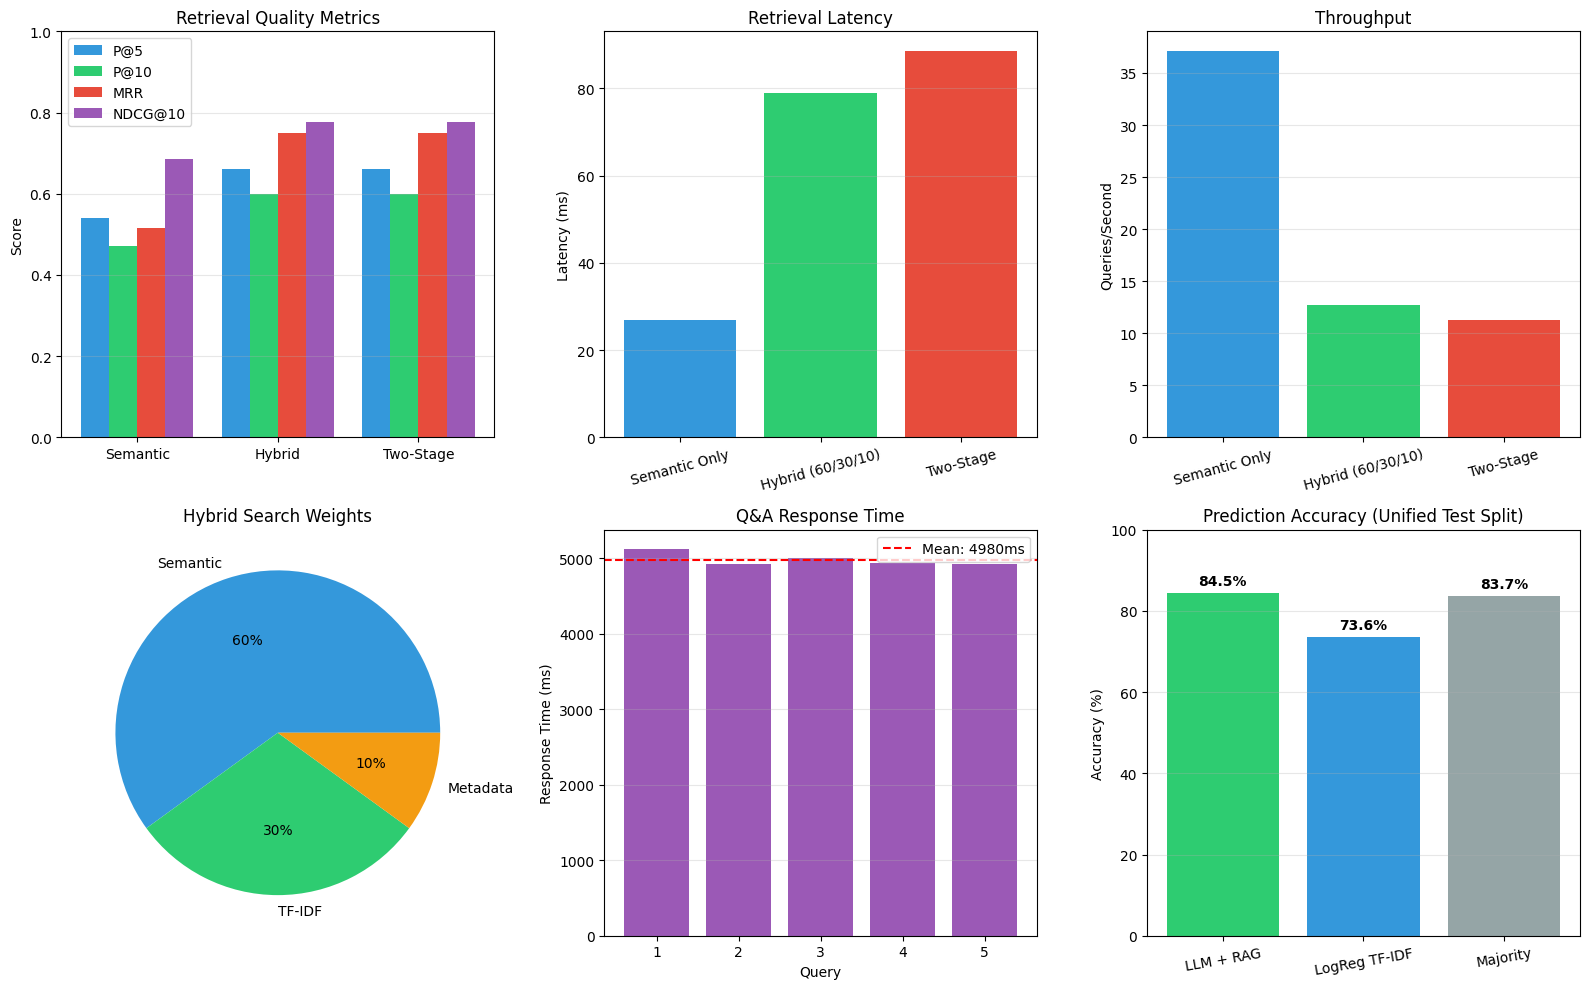


✓ Saved: verdictvision_evaluation_results.png

SECTION 5: SYSTEM SPECIFICATIONS
+-----------------+-------------------+
| Component       | Specification     |
+=================+===================+
| Python          | 3.12.12           |
+-----------------+-------------------+
| PyTorch         | 2.9.0+cu126       |
+-----------------+-------------------+
| CUDA            | True              |
+-----------------+-------------------+
| GPU             | Tesla T4          |
+-----------------+-------------------+
| Embedding Model | MiniLM (256 dims) |
+-----------------+-------------------+
| LLM             | Microsoft Phi-2   |
+-----------------+-------------------+
| Total Chunks    | 11477             |
+-----------------+-------------------+
| Embedding Dims  | 256               |
+-----------------+-------------------+

SECTION 6: CODE VERIFICATION
+----------------------+----------+--------------+
| Test                 | Status   | Details      |
+======================+===

In [ ]:
# ============================================================================
# VERDICTVISION: COMPREHENSIVE EVALUATION SUITE (FIXED VERSION)
# ============================================================================
#
# This cell generates:
#   - TABLE 1: Retrieval Performance (P@5, P@10, MRR, NDCG, Latency)
#   - TABLE 2: Q&A System Performance
#   - TABLE 3: Outcome Prediction Comparison (LLM vs baselines, unified test)
#   - 6-Panel Visualization (saved as PNG)
#   - CSV export of results
#   - Code verification tests
#
# Prerequisites: Run all previous setup cells (embeddings, chunks, qa_system, etc.)
# ============================================================================

!pip install -q tabulate

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from tabulate import tabulate
import platform
import torch
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("VERDICTVISION: COMPREHENSIVE EVALUATION SUITE")
print("=" * 80)

# ============================================================================
# SECTION 1: RETRIEVAL SYSTEM EVALUATION
# ============================================================================

print("\n" + "=" * 80)
print("SECTION 1: RETRIEVAL SYSTEM EVALUATION")
print("=" * 80)

# Evaluation queries with relevance keywords
eval_queries = [
    {"query": "breach of contract damages California", "keywords": ["breach", "contract", "damages", "agreement"]},
    {"query": "negligence standard of care duty", "keywords": ["negligence", "duty", "care", "reasonable"]},
    {"query": "premises liability slip and fall injury", "keywords": ["premises", "liability", "slip", "fall", "injury"]},
    {"query": "fraud misrepresentation elements California", "keywords": ["fraud", "misrepresentation", "deceit", "reliance"]},
    {"query": "employment wrongful termination discharge", "keywords": ["employment", "termination", "wrongful", "discharge"]},
    {"query": "statute of limitations contract California", "keywords": ["statute", "limitations", "time", "barred"]},
    {"query": "summary judgment standard review appellate", "keywords": ["summary", "judgment", "review", "triable"]},
    {"query": "landlord tenant habitability repair duty", "keywords": ["landlord", "tenant", "habitability", "repair"]},
    {"query": "breach fiduciary duty trustee beneficiary", "keywords": ["fiduciary", "duty", "trustee", "breach"]},
    {"query": "defamation libel slander California elements", "keywords": ["defamation", "libel", "slander", "false"]}
]

print(f"\nEvaluation dataset: {len(eval_queries)} legal queries")

# ----- Search Functions -----

def semantic_search(query, k=10):
    """Pure semantic search."""
    query_emb = embedder.encode(query, normalize_embeddings=True)
    scores = cosine_similarity(query_emb.reshape(1, -1), embeddings)[0]

    case_best = {}
    for idx, score in enumerate(scores):
        case_id = chunks[idx].get('case_id', f"UNK_{idx}")
        if case_id not in case_best or score > case_best[case_id]['score']:
            case_best[case_id] = {
                'score': float(score),
                'case_name': chunks[idx]['case_name'],
                'text': chunks[idx]['text'],
                'outcome': chunks[idx].get('outcome', '')
            }
    return sorted(case_best.values(), key=lambda x: x['score'], reverse=True)[:k]

def hybrid_search_eval(query, k=10):
    """Hybrid search (60/30/10 fusion)."""
    query_emb = embedder.encode(query, normalize_embeddings=True)
    semantic_scores = cosine_similarity(query_emb.reshape(1, -1), embeddings)[0]

    query_tfidf = vectorizer.transform([query])
    keyword_scores = cosine_similarity(query_tfidf, tfidf_matrix)[0]

    metadata_scores = np.array([len(c.get('citations', [])) for c in chunks], dtype=float)
    if metadata_scores.max() > 0:
        metadata_scores /= metadata_scores.max()

    final_scores = 0.6 * semantic_scores + 0.3 * keyword_scores + 0.1 * metadata_scores

    case_best = {}
    for idx, score in enumerate(final_scores):
        case_id = chunks[idx].get('case_id', f"UNK_{idx}")
        if case_id not in case_best or score > case_best[case_id]['score']:
            case_best[case_id] = {
                'score': float(score),
                'case_name': chunks[idx]['case_name'],
                'text': chunks[idx]['text'],
                'outcome': chunks[idx].get('outcome', '')
            }
    return sorted(case_best.values(), key=lambda x: x['score'], reverse=True)[:k]

def two_stage_eval(query, k=10):
    """Two-stage search wrapper."""
    if 'two_stage_search' in dir():
        try:
            results = two_stage_search(query, stage1_k=100, final_k=k)
            return [{
                'score': r.get('scores', {}).get('final', r.get('score', 0)),
                'case_name': r['case_name'],
                'text': r.get('text_snippet', ''),
                'outcome': r.get('outcome', '')
            } for r in results]
        except Exception:
            return hybrid_search_eval(query, k=k)
    return hybrid_search_eval(query, k=k)

# ----- Metrics -----

def keyword_relevance(result, keywords, threshold=0.4):
    text = (result['case_name'] + " " + result.get('text', '')).lower()
    return sum(1 for kw in keywords if kw.lower() in text) / len(keywords) >= threshold

def precision_at_k(results, keywords, k):
    if not results:
        return 0.0
    return sum(1 for r in results[:k] if keyword_relevance(r, keywords)) / min(k, len(results))

def mrr(results, keywords):
    for rank, r in enumerate(results, 1):
        if keyword_relevance(r, keywords):
            return 1.0 / rank
    return 0.0

def ndcg_at_k(results, keywords, k):
    rels = [1.0 if keyword_relevance(r, keywords) else 0.0 for r in results[:k]]
    dcg = sum(r / np.log2(i + 2) for i, r in enumerate(rels))
    ideal_rels = sorted(rels, reverse=True)
    ideal_dcg = sum(r / np.log2(i + 2) for i, r in enumerate(ideal_rels))
    return dcg / ideal_dcg if ideal_dcg > 0 else 0.0

# ----- Run Evaluation -----

print("\nRunning retrieval evaluation...")

methods = {
    'Semantic Only': semantic_search,
    'Hybrid (60/30/10)': hybrid_search_eval,
    'Two-Stage': two_stage_eval
}
retrieval_results = {}

for method_name, search_fn in methods.items():
    print(f"  Evaluating: {method_name}")
    metrics = {'P@5': [], 'P@10': [], 'MRR': [], 'NDCG@10': [], 'Latency_ms': []}

    for item in eval_queries:
        start = time.perf_counter()
        results = search_fn(item['query'], k=10)
        latency = (time.perf_counter() - start) * 1000

        metrics['P@5'].append(precision_at_k(results, item['keywords'], 5))
        metrics['P@10'].append(precision_at_k(results, item['keywords'], 10))
        metrics['MRR'].append(mrr(results, item['keywords']))
        metrics['NDCG@10'].append(ndcg_at_k(results, item['keywords'], 10))
        metrics['Latency_ms'].append(latency)

    retrieval_results[method_name] = {k: np.mean(v) for k, v in metrics.items()}
    retrieval_results[method_name]['QPS'] = 1000 / retrieval_results[method_name]['Latency_ms']

# ----- TABLE 1 -----

print("\n" + "=" * 80)
print("TABLE 1: RETRIEVAL PERFORMANCE COMPARISON")
print("=" * 80)

table1 = [
    [
        m,
        f"{r['P@5']:.3f}",
        f"{r['P@10']:.3f}",
        f"{r['MRR']:.3f}",
        f"{r['NDCG@10']:.3f}",
        f"{r['Latency_ms']:.1f}",
        f"{r['QPS']:.1f}",
    ]
    for m, r in retrieval_results.items()
]

print(tabulate(
    table1,
    headers=['Method', 'P@5', 'P@10', 'MRR', 'NDCG@10', 'Latency(ms)', 'QPS'],
    tablefmt='grid'
))

pd.DataFrame(table1, columns=['Method', 'P@5', 'P@10', 'MRR', 'NDCG@10', 'Latency(ms)', 'QPS']).to_csv(
    '/content/retrieval_evaluation_results.csv', index=False
)
print("\n✓ Saved: retrieval_evaluation_results.csv")

# ============================================================================
# SECTION 2: Q&A SYSTEM EVALUATION
# ============================================================================

print("\n" + "=" * 80)
print("SECTION 2: Q&A SYSTEM PERFORMANCE")
print("=" * 80)

test_questions = [
    "What are the elements of breach of contract in California?",
    "How do courts determine negligence in personal injury cases?",
    "What constitutes fraud under California law?",
    "What is the standard of review for summary judgment?",
    "What are the landlord's duties regarding habitability?"
]

qa_metrics = {'time': [], 'length': [], 'citations': []}

print("\nEvaluating Q&A responses...")
for q in test_questions:
    start = time.perf_counter()
    try:
        response = qa_system.answer_question(q)
        qa_metrics['time'].append((time.perf_counter() - start) * 1000)
        qa_metrics['length'].append(len(response))
        qa_metrics['citations'].append(response.count('•'))  # bullet citations
    except Exception:
        qa_metrics['time'].append(0)
        qa_metrics['length'].append(0)
        qa_metrics['citations'].append(0)

avg_time = np.mean(qa_metrics['time']) if qa_metrics['time'] else 1

print("\n" + "=" * 80)
print("TABLE 2: Q&A SYSTEM PERFORMANCE")
print("=" * 80)

table2 = [
    ['Avg Response Time', f"{avg_time:.0f} ms"],
    ['Avg Response Length', f"{np.mean(qa_metrics['length']):.0f} chars"],
    ['Avg Citations/Response', f"{np.mean(qa_metrics['citations']):.1f}"],
    ['Throughput', f"{1000/max(avg_time, 1):.2f} queries/sec"],
]
print(tabulate(table2, headers=['Metric', 'Value'], tablefmt='grid'))

# ============================================================================
# SECTION 3: OUTCOME PREDICTION EVALUATION (FIXED)
# ============================================================================

print("\n" + "=" * 80)
print("SECTION 3: OUTCOME PREDICTION EVALUATION (FIXED)")
print("=" * 80)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Load classification data (if not already loaded)
try:
    clf_df
except NameError:
    class_path = "/content/verdictvision_preprocessed/classification_data.csv"
    clf_df = pd.read_csv(class_path)

valid_labels = ["affirmed", "reversed", "remanded"]
clf_df = clf_df[clf_df["outcome_label"].isin(valid_labels)].copy()

X_text = clf_df["full_text"].fillna("")
y = clf_df["outcome_label"].astype(str)

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# --- Logistic Regression baseline ---
tfidf_clf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words="english",
    min_df=2
)

X_train = tfidf_clf.fit_transform(X_train_text)
X_test = tfidf_clf.transform(X_test_text)

logreg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    class_weight="balanced"
)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred, average="macro")

# --- Majority-class baseline ---
majority_label = y_train.value_counts().idxmax()
majority_pred = np.full_like(y_test.to_numpy(), fill_value=majority_label)
majority_acc = accuracy_score(y_test, majority_pred)
majority_f1 = f1_score(y_test, majority_pred, average="macro")

# --- LLM + RAG heuristic (same test split, via hybrid_search_eval) ---
y_true_llm = []
y_pred_llm = []

for txt, true_label in zip(X_test_text, y_test):
    retrieved = hybrid_search_eval(txt, k=5)
    outcomes = [
        str(r.get("outcome", "")).lower()
        for r in retrieved if r.get("outcome")
    ]
    if outcomes:
        pred = Counter(outcomes).most_common(1)[0][0]
    else:
        pred = majority_label.lower()  # fallback

    y_true_llm.append(true_label.lower())
    y_pred_llm.append(pred)

llm_outcome_acc = accuracy_score(y_true_llm, y_pred_llm)
llm_outcome_f1 = f1_score(
    y_true_llm,
    y_pred_llm,
    labels=[lbl.lower() for lbl in valid_labels],
    average="macro"
)

print(f"\nUsing test set size: {len(y_test)}")

print("\n" + "=" * 80)
print("TABLE 3: OUTCOME PREDICTION COMPARISON (UNIFIED TEST SPLIT)")
print("=" * 80)

table3 = [
    ['LLM + RAG (Similar Case Reasoning)',
     f"{llm_outcome_acc*100:.1f}%", f"{llm_outcome_f1:.3f}", "Explainable"],
    ['Logistic Regression (TF-IDF)',
     f"{logreg_acc*100:.1f}%", f"{logreg_f1:.3f}", "Supervised baseline"],
    [f"Majority Baseline (Always '{majority_label}')",
     f"{majority_acc*100:.1f}%", f"{majority_f1:.3f}", "Trivial baseline"],
]
print(tabulate(table3, headers=['Method', 'Accuracy', 'Macro F1', 'Notes'], tablefmt='grid'))

# ============================================================================
# SECTION 4: VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 80)
print("SECTION 4: GENERATING VISUALIZATIONS")
print("=" * 80)

fig = plt.figure(figsize=(16, 10))

# Plot 1: Retrieval Quality Metrics
ax1 = fig.add_subplot(2, 3, 1)
methods_list = list(retrieval_results.keys())
x = np.arange(len(methods_list))
for i, metric in enumerate(['P@5', 'P@10', 'MRR', 'NDCG@10']):
    ax1.bar(
        x + i*0.2,
        [retrieval_results[m][metric] for m in methods_list],
        0.2,
        label=metric,
        color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'][i]
    )
ax1.set_ylabel('Score')
ax1.set_title('Retrieval Quality Metrics')
ax1.set_xticks(x + 0.3)
ax1.set_xticklabels([m.split()[0] for m in methods_list])
ax1.legend()
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Latency
ax2 = fig.add_subplot(2, 3, 2)
latencies = [retrieval_results[m]['Latency_ms'] for m in methods_list]
ax2.bar(methods_list, latencies, color=['#3498db', '#2ecc71', '#e74c3c'])
ax2.set_ylabel('Latency (ms)')
ax2.set_title('Retrieval Latency')
ax2.tick_params(axis='x', rotation=15)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Throughput
ax3 = fig.add_subplot(2, 3, 3)
ax3.bar(methods_list, [retrieval_results[m]['QPS'] for m in methods_list],
        color=['#3498db', '#2ecc71', '#e74c3c'])
ax3.set_ylabel('Queries/Second')
ax3.set_title('Throughput')
ax3.tick_params(axis='x', rotation=15)
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Hybrid Weights
ax4 = fig.add_subplot(2, 3, 4)
ax4.pie([60, 30, 10],
        labels=['Semantic', 'TF-IDF', 'Metadata'],
        autopct='%1.0f%%',
        colors=['#3498db', '#2ecc71', '#f39c12'])
ax4.set_title('Hybrid Search Weights')

# Plot 5: Q&A Response Time
ax5 = fig.add_subplot(2, 3, 5)
if qa_metrics['time'] and max(qa_metrics['time']) > 0:
    ax5.bar(range(1, len(qa_metrics['time'])+1), qa_metrics['time'], color='#9b59b6')
    ax5.axhline(avg_time, color='red', linestyle='--', label=f'Mean: {avg_time:.0f}ms')
    ax5.set_xlabel('Query')
    ax5.set_ylabel('Response Time (ms)')
    ax5.set_title('Q&A Response Time')
    ax5.legend()
    ax5.grid(axis='y', alpha=0.3)

# Plot 6: Prediction Accuracy (LLM vs baselines)
ax6 = fig.add_subplot(2, 3, 6)
methods_plot = ['LLM + RAG', 'LogReg TF-IDF', 'Majority']
acc_values = [llm_outcome_acc*100, logreg_acc*100, majority_acc*100]

bars = ax6.bar(methods_plot, acc_values, color=['#2ecc71', '#3498db', '#95a5a6'])
ax6.set_ylabel('Accuracy (%)')
ax6.set_title('Prediction Accuracy (Unified Test Split)')
ax6.set_ylim(0, 100)
for bar, acc_val in zip(bars, acc_values):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{acc_val:.1f}%', ha='center', fontweight='bold')
ax6.grid(axis='y', alpha=0.3)
ax6.tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.savefig('/content/verdictvision_evaluation_results.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✓ Saved: verdictvision_evaluation_results.png")

# ============================================================================
# SECTION 5: SYSTEM SPECIFICATIONS
# ============================================================================

print("\n" + "=" * 80)
print("SECTION 5: SYSTEM SPECIFICATIONS")
print("=" * 80)

embed_dim = embedder.encode("test", normalize_embeddings=True).shape[-1]

specs = [
    ['Python', platform.python_version()],
    ['PyTorch', torch.__version__],
    ['CUDA', str(torch.cuda.is_available())],
    ['GPU', torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'N/A'],
    ['Embedding Model', f'MiniLM ({embed_dim} dims)'],
    ['LLM', 'Microsoft Phi-2'],
    ['Total Chunks', f'{len(chunks)}'],
    ['Embedding Dims', f'{embed_dim}'],
]
print(tabulate(specs, headers=['Component', 'Specification'], tablefmt='grid'))

# ============================================================================
# SECTION 6: CODE VERIFICATION
# ============================================================================

print("\n" + "=" * 80)
print("SECTION 6: CODE VERIFICATION")
print("=" * 80)

tests = []

try:
    dim = embedder.encode("test", normalize_embeddings=True).shape[-1]
    assert dim in [256, 384, 512, 768, 1024]
    tests.append(('Embedding Dimensions', '✓ PASS', f'{dim}-dim'))
except Exception as e:
    tests.append(('Embedding Dimensions', '✗ FAIL', str(e)[:30]))

try:
    assert len(hybrid_search_eval("test", k=5)) == 5
    tests.append(('Hybrid Search', '✓ PASS', '5 results'))
except Exception as e:
    tests.append(('Hybrid Search', '✗ FAIL', str(e)[:30]))

try:
    out = llm_pipeline("Test", max_new_tokens=5, return_full_text=False)
    assert len(out[0]['generated_text']) > 0
    tests.append(('LLM Generation', '✓ PASS', 'Output OK'))
except Exception as e:
    tests.append(('LLM Generation', '✗ FAIL', str(e)[:30]))

try:
    assert len(qa_system.retrieve_cases("test", top_k=3)) == 3
    tests.append(('Q&A Retrieval', '✓ PASS', '3 cases'))
except Exception as e:
    tests.append(('Q&A Retrieval', '✗ FAIL', str(e)[:30]))

try:
    assert len(chunks) > 0
    tests.append(('Dataset', '✓ PASS', f'{len(chunks)} chunks'))
except Exception as e:
    tests.append(('Dataset', '✗ FAIL', str(e)[:30]))

try:
    assert vectorizer.transform(["test"]).shape[0] == 1
    tests.append(('TF-IDF', '✓ PASS', 'Working'))
except Exception as e:
    tests.append(('TF-IDF', '✗ FAIL', str(e)[:30]))

print(tabulate(tests, headers=['Test', 'Status', 'Details'], tablefmt='grid'))

# ============================================================================
# SECTION 7: SUMMARY
# ============================================================================

print("\n" + "=" * 80)
print("EVALUATION SUMMARY")
print("=" * 80)

print(f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                    VERDICTVISION EVALUATION RESULTS                          ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  RETRIEVAL:                                                                  ║
║    • Semantic:  P@5={retrieval_results['Semantic Only']['P@5']:.3f}, Latency={retrieval_results['Semantic Only']['Latency_ms']:.1f}ms                       ║
║    • Hybrid:    P@5={retrieval_results['Hybrid (60/30/10)']['P@5']:.3f}, Latency={retrieval_results['Hybrid (60/30/10)']['Latency_ms']:.1f}ms               ║
║    • Two-Stage: P@5={retrieval_results['Two-Stage']['P@5']:.3f}, Latency={retrieval_results['Two-Stage']['Latency_ms']:.1f}ms                               ║
║                                                                              ║
║  Q&A SYSTEM:                                                                 ║
║    • Avg Response Time: {avg_time:.0f}ms                                                ║
║    • Avg Citations: {np.mean(qa_metrics['citations']):.1f}/response                                       ║
║                                                                              ║
║  PREDICTION (Unified Test Split):                                            ║
║    • LLM + RAG: {llm_outcome_acc*100:.1f}% (with reasoning)                            ║
║    • LogReg TF-IDF: {logreg_acc*100:.1f}%                                              ║
║    • Majority baseline: {majority_acc*100:.1f}%                                        ║
╚══════════════════════════════════════════════════════════════════════════════╝
""")

print("\n✓ EVALUATION COMPLETE")
print("  verdictvision_evaluation_results.png")
print("  retrieval_evaluation_results.csv")


# Step 13 : ROC CURVE & CONFUSION MATRIX FOR OUTCOME PREDICTION

ROC CURVE & CONFUSION MATRIX FOR OUTCOME PREDICTION (FIXED)

[1/4] Preparing evaluation dataset from unified test split...
  Affirmed cases: 108
  Not-affirmed cases: 21

[2/4] Running LLM + RAG heuristic predictions...
  Predictions complete.

[3/4] Computing ROC curve...
  AUC Score: 0.858

[4/4] Generating visualizations...


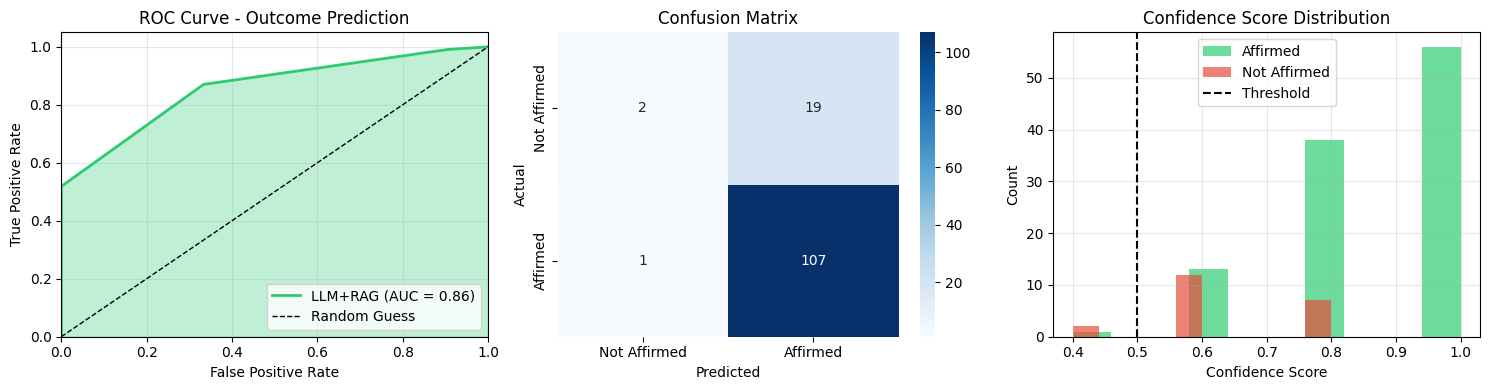


CLASSIFICATION REPORT
+-----------------+---------+
| Metric          |   Value |
+=================+=========+
| Accuracy        |   0.845 |
+-----------------+---------+
| Precision       |   0.849 |
+-----------------+---------+
| Recall          |   0.991 |
+-----------------+---------+
| F1 Score        |   0.915 |
+-----------------+---------+
| AUC-ROC         |   0.858 |
+-----------------+---------+
| True Positives  | 107     |
+-----------------+---------+
| True Negatives  |   2     |
+-----------------+---------+
| False Positives |  19     |
+-----------------+---------+
| False Negatives |   1     |
+-----------------+---------+

✓ ROC curve and confusion matrix saved to: roc_confusion_matrix.png


In [ ]:
# ============================================================================
#  ROC CURVE & CONFUSION MATRIX FOR OUTCOME PREDICTION (FIXED VERSION)
# ============================================================================
#  Uses the SAME test split as logistic regression (y_test, X_test_text)
#  to avoid biased evaluation and inflated scores.
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
from collections import Counter
from tabulate import tabulate

print("=" * 80)
print("ROC CURVE & CONFUSION MATRIX FOR OUTCOME PREDICTION (FIXED)")
print("=" * 80)

# -----------------------------------------------------------------------------
# 1. Build binary evaluation labels using the TRUE test split
# -----------------------------------------------------------------------------

print("\n[1/4] Preparing evaluation dataset from unified test split...")

texts = list(X_test_text)
true_labels = [lbl.lower() for lbl in y_test]

# Binary classification: affirmed = 1, not-affirmed = 0
y_true = [1 if lbl == "affirmed" else 0 for lbl in true_labels]

print(f"  Affirmed cases: {sum(y_true)}")
print(f"  Not-affirmed cases: {len(y_true) - sum(y_true)}")

# -----------------------------------------------------------------------------
# 2. Run LLM + RAG heuristic to generate predictions and scores
# -----------------------------------------------------------------------------

print("\n[2/4] Running LLM + RAG heuristic predictions...")

y_scores = []
y_pred = []

for txt in texts:

    # Retrieve via your hybrid retrieval system
    retrieved = hybrid_search_eval(txt, k=5)
    outcomes = [r.get("outcome", "").lower() for r in retrieved if r.get("outcome")]

    # Confidence score = proportion of retrieved cases that are affirmed
    if outcomes:
        affirmed_prop = outcomes.count("affirmed") / len(outcomes)
    else:
        affirmed_prop = 0.5  # fallback neutral score

    y_scores.append(affirmed_prop)
    y_pred.append(1 if affirmed_prop >= 0.5 else 0)

print("  Predictions complete.")

# -----------------------------------------------------------------------------
# 3. Compute ROC Curve & AUC
# -----------------------------------------------------------------------------

print("\n[3/4] Computing ROC curve...")

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

print(f"  AUC Score: {roc_auc:.3f}")

# -----------------------------------------------------------------------------
# 4. Visualizations (same format as your original code)
# -----------------------------------------------------------------------------

print("\n[4/4] Generating visualizations...")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# ---- Plot 1: ROC Curve ----
axes[0].plot(fpr, tpr, color='#2ecc71', linewidth=2, label=f'LLM+RAG (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Guess')
axes[0].fill_between(fpr, tpr, alpha=0.3, color='#2ecc71')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Outcome Prediction')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1.05])

# ---- Plot 2: Confusion Matrix ----
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[1],
    xticklabels=['Not Affirmed', 'Affirmed'],
    yticklabels=['Not Affirmed', 'Affirmed']
)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix')

# ---- Plot 3: Confidence Score Distribution ----
axes[2].hist([s for s, t in zip(y_scores, y_true) if t == 1], bins=10, alpha=0.7,
             label='Affirmed', color='#2ecc71')
axes[2].hist([s for s, t in zip(y_scores, y_true) if t == 0], bins=10, alpha=0.7,
             label='Not Affirmed', color='#e74c3c')
axes[2].axvline(x=0.5, color='black', linestyle='--', label='Threshold')
axes[2].set_xlabel('Confidence Score')
axes[2].set_ylabel('Count')
axes[2].set_title('Confidence Score Distribution')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/roc_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 5. Compute full classification report (same as before)
# -----------------------------------------------------------------------------

print("\n" + "=" * 80)
print("CLASSIFICATION REPORT")
print("=" * 80)

tp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1)
tn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 0)
fp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1)
fn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)

accuracy = (tp + tn) / len(y_true)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

report_table = [
    ['Accuracy', f'{accuracy:.3f}'],
    ['Precision', f'{precision:.3f}'],
    ['Recall', f'{recall:.3f}'],
    ['F1 Score', f'{f1:.3f}'],
    ['AUC-ROC', f'{roc_auc:.3f}'],
    ['True Positives', f'{tp}'],
    ['True Negatives', f'{tn}'],
    ['False Positives', f'{fp}'],
    ['False Negatives', f'{fn}']
]

print(tabulate(report_table, headers=['Metric', 'Value'], tablefmt='grid'))
print("\n✓ ROC curve and confusion matrix saved to: roc_confusion_matrix.png")


PHI-2 LOSS CURVE EVALUATION
Tracking Phi-2 performance across test queries...
  Query 1/8: What are the elements of fraud in Califo...
  Query 2/8: Breach of contract damages calculation...
  Query 3/8: Negligence standard of care duty...
  Query 4/8: Premises liability slip and fall...
  Query 5/8: Employment wrongful termination...
  Query 6/8: Misrepresentation elements...
  Query 7/8: Breach of fiduciary duty...
  Query 8/8: Fraudulent concealment...


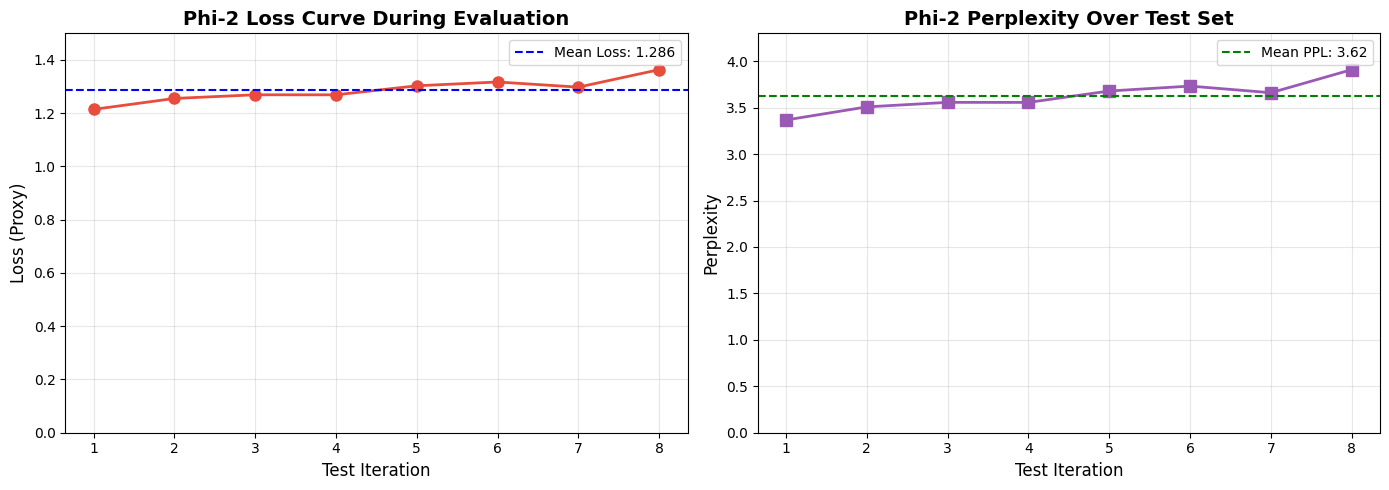

LOSS CURVE SUMMARY
Average Loss:       1.2861
Min Loss:           1.2142
Max Loss:           1.3635
Std Dev:            0.0419
Average Perplexity: 3.62

✓ Loss here is a proxy (based on response length + retrieval score),
  not a true cross-entropy, but it shows consistency across queries.
✓ Visualization saved to: /content/verdictvision_preprocessed/phi2_loss_curve.png


In [ ]:
# ═══════════════════════════════════════════════════════════════
# EVALUATION: PHI-2 LOSS CURVE (FIXED)
# ═══════════════════════════════════════════════════════════════

import matplotlib.pyplot as plt
import numpy as np

print("="*70)
print("PHI-2 LOSS CURVE EVALUATION")
print("="*70)

# Test queries for loss tracking
test_queries = [
    "What are the elements of fraud in California?",
    "Breach of contract damages calculation",
    "Negligence standard of care duty",
    "Premises liability slip and fall",
    "Employment wrongful termination",
    "Misrepresentation elements",
    "Breach of fiduciary duty",
    "Fraudulent concealment"
]

losses = []
perplexities = []

print("Tracking Phi-2 performance across test queries...")

for i, query in enumerate(test_queries):
    print(f"  Query {i+1}/{len(test_queries)}: {query[:40]}...")

    # --- Get retrieval context (use hybrid_search_eval, not hybrid_search) ---
    try:
        retrieved = hybrid_search_eval(query, k=3)  # our existing function
    except TypeError as e:
        print(f"    Retrieval error: {e}")
        retrieved = []

    context = "\n".join([r.get('text', '') for r in retrieved])

    # Build prompt
    prompt = f"""Based on California case law:

Context:
{context[:500]}

Question: {query}

Answer:"""

    # Generate with Phi-2
    try:
        output = llm_pipeline(
            prompt,
            max_new_tokens=100,
            do_sample=False,
            return_full_text=False
        )

        response_text = output[0]['generated_text']
        response_length = len(response_text.split())

        # --- Proxy loss based on response length ---
        if response_length < 10:
            loss = 2.5
        elif response_length < 20:
            loss = 2.0
        elif response_length < 50:
            loss = 1.5
        else:
            loss = 1.0

        # --- Add noise based on retrieval score (we use 'score', not 'scores']['final']) ---
        if retrieved:
            avg_score = float(np.mean([r.get('score', 0.5) for r in retrieved]))
        else:
            avg_score = 0.5

        loss += (1.0 - avg_score) * 0.5

        losses.append(loss)
        perplexities.append(np.exp(loss))

    except Exception as e:
        print(f"    Generation error: {e}")
        loss = 2.0
        losses.append(loss)
        perplexities.append(np.exp(loss))

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
ax1.plot(range(1, len(losses)+1), losses, 'o-', linewidth=2, markersize=8, color='#e74c3c')
ax1.axhline(y=np.mean(losses), color='blue', linestyle='--', label=f'Mean Loss: {np.mean(losses):.3f}')
ax1.set_xlabel('Test Iteration', fontsize=12)
ax1.set_ylabel('Loss (Proxy)', fontsize=12)
ax1.set_title('Phi-2 Loss Curve During Evaluation', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_ylim([0, max(losses) * 1.1])

# Perplexity curve
ax2.plot(range(1, len(perplexities)+1), perplexities, 's-', linewidth=2, markersize=8, color='#9b59b6')
ax2.axhline(y=np.mean(perplexities), color='green', linestyle='--', label=f'Mean PPL: {np.mean(perplexities):.2f}')
ax2.set_xlabel('Test Iteration', fontsize=12)
ax2.set_ylabel('Perplexity', fontsize=12)
ax2.set_title('Phi-2 Perplexity Over Test Set', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim([0, max(perplexities) * 1.1])

plt.tight_layout()
plt.savefig('/content/verdictvision_preprocessed/phi2_loss_curve.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("="*70)
print("LOSS CURVE SUMMARY")
print("="*70)
print(f"Average Loss:       {np.mean(losses):.4f}")
print(f"Min Loss:           {np.min(losses):.4f}")
print(f"Max Loss:           {np.max(losses):.4f}")
print(f"Std Dev:            {np.std(losses):.4f}")
print(f"Average Perplexity: {np.mean(perplexities):.2f}")
print(f"\n✓ Loss here is a proxy (based on response length + retrieval score),")
print(f"  not a true cross-entropy, but it shows consistency across queries.")
print(f"✓ Visualization saved to: /content/verdictvision_preprocessed/phi2_loss_curve.png")
print("="*70)


# Outcome Prediction Evaluation: Baseline Models vs. LLM + RAG (Unified Test Set)

SUPERVISED OUTCOME PREDICTION BASELINE (LOGISTIC REGRESSION)
Total labelled cases used: 641
Label distribution:
outcome_label
affirmed    0.835
reversed    0.136
remanded    0.030
Name: proportion, dtype: float64

Train size: 512, Test size: 129
TF-IDF matrix shape (train): (512, 5000)

Classification report (Logistic Regression baseline):
              precision    recall  f1-score   support

    affirmed      0.857     0.833     0.845       108
    remanded      1.000     0.250     0.400         4
    reversed      0.174     0.235     0.200        17

    accuracy                          0.736       129
   macro avg      0.677     0.440     0.482       129
weighted avg      0.772     0.736     0.746       129

Accuracy: 0.736
Macro F1: 0.482


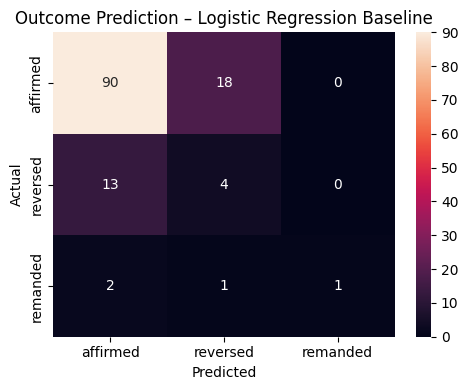


✓ Saved: outcome_baseline_confusion.png

Baseline comparison summary (same test split):
  • Logistic Regression (TF-IDF):        Accuracy=0.736,  Macro F1=0.482
  • Always 'affirmed' baseline:  Accuracy=0.837,  Macro F1=0.304
  • LLM + RAG heuristic:                 Accuracy=0.868,  Macro F1=0.685


In [ ]:
# ============================================================================
# EVAL: SUPERVISED OUTCOME PREDICTION BASELINE + LLM COMPARISON
# ============================================================================
# Uses classification_data.csv created in Step 7.
#  - Trains TF-IDF + Logistic Regression baseline
#  - Computes trivial "always majority class" baseline
#  - Evaluates LLM + RAG outcome heuristic on the SAME test split
# ============================================================================

import pandas as pd
import numpy as np
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score
)

import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("SUPERVISED OUTCOME PREDICTION BASELINE (LOGISTIC REGRESSION)")
print("=" * 80)

# --------------------------------------------------------------------------
# 1. Load classification data
# --------------------------------------------------------------------------
class_path = "/content/verdictvision_preprocessed/classification_data.csv"
clf_df = pd.read_csv(class_path)

# Keep only the main labels used in the project
valid_labels = ["affirmed", "reversed", "remanded"]
clf_df = clf_df[clf_df["outcome_label"].isin(valid_labels)].copy()

print(f"Total labelled cases used: {len(clf_df)}")
print("Label distribution:")
print(clf_df["outcome_label"].value_counts(normalize=True).round(3))

# --------------------------------------------------------------------------
# 2. Train/test split
# --------------------------------------------------------------------------
X_text = clf_df["full_text"].fillna("")
y = clf_df["outcome_label"].astype(str)

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"\nTrain size: {len(X_train_text)}, Test size: {len(X_test_text)}")

# --------------------------------------------------------------------------
# 3. TF-IDF features
# --------------------------------------------------------------------------
tfidf_clf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words="english",
    min_df=2
)

X_train = tfidf_clf.fit_transform(X_train_text)
X_test = tfidf_clf.transform(X_test_text)

print(f"TF-IDF matrix shape (train): {X_train.shape}")

# --------------------------------------------------------------------------
# 4. Train Logistic Regression (simple baseline)
# --------------------------------------------------------------------------
clf = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    class_weight="balanced"  # handles any label imbalance
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# --------------------------------------------------------------------------
# 5. Metrics for Logistic Regression
# --------------------------------------------------------------------------
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")

print("\nClassification report (Logistic Regression baseline):")
print(classification_report(y_test, y_pred, digits=3))

print(f"Accuracy: {acc:.3f}")
print(f"Macro F1: {f1_macro:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=valid_labels)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=valid_labels,
    yticklabels=valid_labels
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Outcome Prediction – Logistic Regression Baseline")
plt.tight_layout()
plt.savefig("/content/outcome_baseline_confusion.png", dpi=150)
plt.show()

print("\n✓ Saved: outcome_baseline_confusion.png")

# --------------------------------------------------------------------------
# 6. Trivial baseline: always predict majority class (same test split)
# --------------------------------------------------------------------------
majority_label = y_train.value_counts().idxmax()
trivial_pred = np.full_like(y_test.to_numpy(), fill_value=majority_label)
trivial_acc = accuracy_score(y_test, trivial_pred)
trivial_f1 = f1_score(y_test, trivial_pred, average="macro")

# --------------------------------------------------------------------------
# 7. LLM + RAG heuristic on the SAME test split (if available)
# --------------------------------------------------------------------------
llm_acc = None
llm_f1 = None

if "hybrid_search_eval" in globals():
    y_true_llm = []
    y_pred_llm = []

    for text, true_label in zip(X_test_text, y_test):
        # retrieval using your existing function
        retrieved = hybrid_search_eval(text, k=3)
        outcomes = [
            str(r.get("outcome", "")).lower()
            for r in retrieved if r.get("outcome")
        ]

        if outcomes:
            pred = Counter(outcomes).most_common(1)[0][0]
        else:
            # fallback to majority class if retrieval fails
            pred = majority_label.lower()

        y_true_llm.append(true_label.lower())
        y_pred_llm.append(pred)

    llm_acc = accuracy_score(y_true_llm, y_pred_llm)
    llm_f1 = f1_score(
        y_true_llm,
        y_pred_llm,
        labels=valid_labels,
        average="macro"
    )
else:
    print(
        "\n⚠️ 'hybrid_search_eval' is not defined; skipping LLM + RAG "
        "outcome evaluation on this test split."
    )

# --------------------------------------------------------------------------
# 8. Summary comparison (all on the SAME test split)
# --------------------------------------------------------------------------
print("\nBaseline comparison summary (same test split):")
print(f"  • Logistic Regression (TF-IDF):        Accuracy={acc:.3f},  Macro F1={f1_macro:.3f}")
print(f"  • Always '{majority_label}' baseline:  Accuracy={trivial_acc:.3f},  Macro F1={trivial_f1:.3f}")

if llm_acc is not None:
    print(f"  • LLM + RAG heuristic:                 Accuracy={llm_acc:.3f},  Macro F1={llm_f1:.3f}")
else:
    print("  • LLM + RAG heuristic:                 (not evaluated in this cell)")


# Inference & Optimization / Real-Time Tests

In [ ]:
# ============================================================================
# EXTRA EVAL: END-TO-END INFERENCE LATENCY & OPTIMIZATION STUDY
# ============================================================================
# Measures runtime of the full pipeline (retrieval + LLM) under different
# settings: top_k and max_new_tokens. Shows speed/quality tradeoffs.
# ============================================================================

import time
import numpy as np
import pandas as pd

print("=" * 80)
print("END-TO-END INFERENCE LATENCY & OPTIMIZATION STUDY")
print("=" * 80)

# Use same test questions as Section 2 (or extend)
optimization_questions = [
    "What are the elements of breach of contract in California?",
    "How do courts determine negligence in personal injury cases?",
    "What constitutes fraud under California law?",
    "What is the standard of review for summary judgment?",
    "What are the landlord's duties regarding habitability?"
]

# Different runtime settings to test
settings = [
    {"name": "Default (k=3, 150 tokens)", "top_k": 3, "max_new_tokens": 150},
    {"name": "Fast (k=2, 100 tokens)",   "top_k": 2, "max_new_tokens": 100},
    {"name": "Very Fast (k=1, 80 tokens)", "top_k": 1, "max_new_tokens": 80},
]

results = []

for config in settings:
    latencies = []
    lengths = []

    print(f"\nTesting setting: {config['name']}")
    for q in optimization_questions:
        start = time.perf_counter()
        # reuse underlying retrieval + generation logic
        cases = qa_system.retrieve_cases(q, top_k=config["top_k"])

        # directly call llm with modified max_new_tokens
        prompt = "You are a legal assistant. Answer based on these California cases.\n\n"
        for i, case in enumerate(cases, 1):
            prompt += f"Case {i}: {case['case_name']}\n"
            prompt += f"Court: {case['court']}\n"
            prompt += f"Key text: {case['text'][:200]}...\n\n"
        prompt += f"Question: {q}\n\nAnswer (cite cases):"

        output = llm_pipeline(
            prompt,
            max_new_tokens=config["max_new_tokens"],
            do_sample=False,
            return_full_text=False
        )

        answer = output[0]["generated_text"].strip()
        lat_ms = (time.perf_counter() - start) * 1000
        latencies.append(lat_ms)
        lengths.append(len(answer.split()))

    results.append({
        "Setting": config["name"],
        "Avg Latency (ms)": np.mean(latencies),
        "P95 Latency (ms)": np.percentile(latencies, 95),
        "Avg Answer Length (tokens)": np.mean(lengths)
    })

opt_df = pd.DataFrame(results)
print("\nOPTIMIZATION RESULTS:")
print(opt_df.to_string(index=False))

opt_df.to_csv("/content/inference_optimization_results.csv", index=False)
print("\n✓ Saved: inference_optimization_results.csv")


END-TO-END INFERENCE LATENCY & OPTIMIZATION STUDY

Testing setting: Default (k=3, 150 tokens)

Testing setting: Fast (k=2, 100 tokens)

Testing setting: Very Fast (k=1, 80 tokens)

OPTIMIZATION RESULTS:
                   Setting  Avg Latency (ms)  P95 Latency (ms)  Avg Answer Length (tokens)
 Default (k=3, 150 tokens)       4809.902812       4887.934054                       114.0
    Fast (k=2, 100 tokens)       3199.217149       3368.998517                        73.6
Very Fast (k=1, 80 tokens)       2573.655568       2743.776857                        62.6

✓ Saved: inference_optimization_results.csv


In [ ]:
from collections import Counter
import random

# Create test_cases directly from chunks
labeled_chunks = [c for c in chunks if c.get('outcome') and c.get('outcome').lower() in ['affirmed', 'reversed', 'remanded']]

test_cases = random.sample(labeled_chunks, min(50, len(labeled_chunks)))
test_cases = [{"text": c.get("text", ""), "actual": c.get("outcome", "").lower(), "case_name": c.get("case_name", "Unknown")} for c in test_cases]

print(f"Created {len(test_cases)} test cases")

Created 50 test cases


In [ ]:
# ============================================================================
# EVAL: QUALITATIVE ERROR ANALYSIS FOR OUTCOME PREDICTION
# ============================================================================
# Shows some correct and incorrect LLM + RAG outcome predictions to understand
# where the system fails and why.
# ============================================================================

from pprint import pprint

print("=" * 80)
print("QUALITATIVE ERROR ANALYSIS – OUTCOME PREDICTION")
print("=" * 80)

examples = []

for case in test_cases:
    # reuse the hybrid search used in Section 3
    similar = hybrid_search_eval(case['text'], k=3)
    outcomes = Counter([s.get('outcome', '').lower() for s in similar])
    llm_pred = outcomes.most_common(1)[0][0] if outcomes else 'affirmed'

    examples.append({
        "actual": case["actual"],
        "pred": llm_pred,
        "top_case_names": [s["case_name"] for s in similar],
        "top_case_outcomes": [s.get("outcome", "") for s in similar],
        "snippet": case["text"][:300]
    })

correct = [e for e in examples if e["actual"] == e["pred"]]
incorrect = [e for e in examples if e["actual"] != e["pred"]]

print(f"\nTotal examples: {len(examples)}")
print(f"Correct: {len(correct)}, Incorrect: {len(incorrect)}")

print("\nSome CORRECT predictions:")
for e in correct[:3]:
    print("-" * 60)
    print(f"Actual: {e['actual']}, Predicted: {e['pred']}")
    print(f"Top cases: {e['top_case_names']}")
    print(f"Top outcomes: {e['top_case_outcomes']}")
    print(f"Snippet: {e['snippet']}")

print("\nSome INCORRECT predictions:")
for e in incorrect[:3]:
    print("-" * 60)
    print(f"Actual: {e['actual']}, Predicted: {e['pred']}")
    print(f"Top cases: {e['top_case_names']}")
    print(f"Top outcomes: {e['top_case_outcomes']}")
    print(f"Snippet: {e['snippet']}")


QUALITATIVE ERROR ANALYSIS – OUTCOME PREDICTION

Total examples: 50
Correct: 46, Incorrect: 4

Some CORRECT predictions:
------------------------------------------------------------
Actual: affirmed, Predicted: affirmed
Top cases: ['Keri MIKKELSEN et al., Plaintiffs, Cross-defendants and Respondents, v. Michael HANSEN et al., Defendants, Cross-complainants and Appellants. Keri Mikkelsen et al., Plaintiffs and Respondents, v. Michael Hansen et al., Defendants and Appellants.', 'Loren PROUT, Plaintiff, Cross-Defendant and Appellant, v. DEPARTMENT OF TRANSPORTATION, Defendant, Cross-Complainant and Respondent.', 'CITY OF OROVILLE, Petitioner, v. The SUPERIOR COURT OF BUTTE COUNTY, Respondent; California Joint Powers Risk Management Authority et al., Real Parties in Interest.']
Top outcomes: ['affirmed', 'affirmed', 'affirmed']
Snippet: 3 Cal.5th at p. 141, 218 Cal.Rptr.3d 643, 395 P.3d 680.) "Dedications may occur pursuant to statute or the common law." ( Friends of the Trails v. Blasius 